## Modeling of canonical trans-activation of one receptor by one ligand

By Rachael Kuintzle

2020-07-13

### Transactivation and competitive trans-inhibition

Canonical Notch transactivation involves the following steps:
- Receptor and ligand are each produced and degraded with specific production and endocytosis rates. 
- Receptor and ligand can bind and dissociate. These interactions are quite fast (possibly on the order of milliseconds: [Luca et al., 2017](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5459593/#SD1)), and therefore occur on a timescale separate from that of receptor and ligand production/endocytosis. 
- The amount of trans-complex $T$ relative to free ligand and receptor at steady-state is defined by the equilibrium dissociation constant, $K_d$. 
- $T$ can be activated to form activated receptor, $N$. During this process, ligand and receptor leave the system in equimolar amounts, assuming 1:1 stoichiometry.
- We assume receptor can be endocytosed when free as well as when complex with ligand in trans. Receptor endocytosis from a trans-complex cluster results in loss of receptor and trans ligand into the receiving cell.

In the simplest case, we assume that reaction rates can be represented by simple constants. In the reaction below, we also consider production and turnover of $R$ and $L_T$, as well as turnover of $N$, although that is not shown.

\begin{align}
R + L_T \leftrightarrow^{k^+_T}_{k^-_{T}} T \rightarrow^{\gamma_T} N
\end{align}

\begin{align}
T \rightarrow^{\gamma_R} \ Ø
\end{align}

To model trans-activation/inhibition with a 'constant' $\gamma_T$ (though it will also depend on Lfng expression), we assume that 
- all $R:L$ 'clusters' have a stoichiometry of 1:1 AND
- probability of activation does not increase with cluster size

To incorporate effects of Fringe modification, we can make $\gamma_T$ and $K_d$ depend on Lfng ($F$),

\begin{align}
\gamma_T(F) &= 
\begin{cases}
x \ \ \mathrm{ if } \ \ F \ge F_{\mathrm{thresh}} \\
y \ \ \mathrm{ otherwise} 
\end{cases} \end{align}

We can use a similar function for $K_d$.

### Variables:

- $R$ is surface receptor concentration at cell interface
- $N$ is activated receptor (NICD) concentration
- $L$ is surface ligand concentration at cell interface
- $T$ = $R:L$, receptor-ligand complex in trans
- $i$ is index of receptor. $i = \{1, 2, 3\}$ for receptor = {Notch1, Notch2, Notch3}.
- $j$ is index of ligand. $j = \{1, 2, 3, 4\}$ for ligand = {Dll1, Dll4, Jag1, Jag2}. 

### Parameters

- $\alpha_L$, surface ligand production rate
- $\alpha_R$, surface receptor production rate
- $\gamma_L$, surface ligand endocytosis rate (unstimulated)
- $\gamma_R$, is surface receptor endocytosis rate
- $\gamma_T$, surface ligand endocytosis rate (stimulated)
- $\gamma_{N}$, activated receptor degradation rate (known! ~75 min)
- $d_R$, rate of leaky (ligand-independent) receptor activation
- $K_d$, **relative** equilibrium dissociation constant


## ODEs and other equations

\begin{align}
L_{tot} = L + T; R_{tot} = R + T
\end{align}

\begin{align}
\frac{dL_{tot}}{dt} = \alpha_L - \gamma_{L} L - \gamma_R T -  \gamma_T T  \rightarrow \frac{dL_{tot}}{dt} = \alpha_L - \gamma_{L} \left( L_{tot} - T \right) - \gamma_R T - \gamma_T T
\end{align}

\begin{align}
\frac{dR_{tot}}{dt} = \alpha_R - \gamma_{R} R - \gamma_{R} T -  \gamma_T T \rightarrow \frac{dR_{tot}}{dt} = \alpha_R - \gamma_{R} R_{tot} -  \gamma_T T 
\end{align}

\begin{align}
\frac{dN}{dt} =  \gamma_T T - \gamma_{N} N
\end{align}

\begin{align}
T = \frac{R L}{K_d} = \frac{(R_{tot} - T)(L_{tot} - T)}{K_d}
\end{align}

\begin{align}
T = \frac{1}{2} \left((K_d + R_{tot} + L_{tot}) \pm \sqrt{(K_d + R_{tot} + L_{tot})^2 - 4 R_{tot} L_{tot}}\right)
\end{align}

#### Derivation of $T$:

I don't know what $\frac{dT}{dt}$ looks like, but I can solve for $T$ using the equilibrium relationship $T = \frac{R L}{K_d}$:

\begin{align}
T = \frac{R L}{K_d} = \frac{(R_{tot} - T)(L_{tot} - T)}{K_d}
\end{align}

Note: technically, it should be the Michaelis constant $K_m$ in the above equation ($\frac{k^- + k^*}{k^+}$), rather than $K_d$; however, because we assume $k^- >> k^*$ (separation of timescales), we can say $K_m \approx K_d$.

We can compute $T$ at any time based on levels of $R_{tot}$  and $L_{tot}$ by solving the above equation for $T$:

\begin{align}
T K_d = R_{tot} L - R_{tot} T - L T + T^2
\end{align}

\begin{align}
0 = T^2 - T K_d - R_{tot} T - L_{tot} T + R_{tot} L_{tot}
\end{align}

\begin{align}
0 = (1)T^2 + (- K_d - R_{tot} - L_{tot}) T + (R_{tot} L_{tot})
\end{align}

\begin{align}
T = \frac{1}{2} \left((K_d + R_{tot} + L_{tot}) \pm \sqrt{(- K_d - R_{tot} - L_{tot})^2 - 4 R_{tot} L_{tot}}\right)
\end{align}

\begin{align}
T = \frac{1}{2} \left((K_d + R_{tot} + L_{tot}) \pm \sqrt{(K_d + R_{tot} + L_{tot})^2 - 4 R_{tot} L_{tot}}\right)
\end{align}

### Non-dimensionalization

All concentration variables are relative to $K_d$. This works out so that the production rates ($\alpha$) are also ratios of true production rate over $K_d$. 

### If we consider leaky activation, our equations are:

\begin{align}
\frac{dL_{tot}}{dt} = \alpha_L - \gamma_{L} \left( L_{tot} - T \right) - \gamma_R T - \gamma_T T
\end{align}

\begin{align}
\frac{dR_{tot}}{dt} = \alpha_R - \gamma_{R} R_{tot} -  \gamma_T T - d_R (R_{tot} - T)
\end{align}

\begin{align}
\frac{dN}{dt} =  \gamma_T T + d_R (R_{tot} - T) - \gamma_{N} N
\end{align}

\begin{align}
T = \frac{1}{2} \left((K_d + R_{tot} + L_{tot}) \pm \sqrt{(K_d + R_{tot} + L_{tot})^2 - 4 R_{tot} L_{tot}}\right)
\end{align}

In [1]:
# NumPy and odeint, our workhorses
import numpy as np
import scipy.integrate

# For interactive plots
import ipywidgets

# For data management
import pandas as pd

# Import plotting stuff
import matplotlib.pyplot as plt
import seaborn as sns
# Set matplotlib rc params.
rc = {'lines.linewidth' : 2, 'axes.labelsize' : 20, 'legend.fontsize': 12,
        'axes.titlesize' : 25, 'xtick.labelsize': 15, 'ytick.labelsize': 15}

sns.set(rc=rc)
sns.set_style("whitegrid")

%matplotlib inline

In [2]:
def plot_dynamics(t, y_vals, normalized=False, 
                  normalize_to_max=True, leg_loc='center right', 
#                   leg_lab = ('$R$','$L$','$N$','$T$'), 
#                   leg_lab = ('Free receptor','Free ligand',
#                              'Activated receptor','Trans R:L complex'),
                  leg_lab = ('Total receptor','Total ligand',
                             'Activated receptor','Trans R:L complex'),
                  xlab = 'time (hr)',
                  ylab = 'dimensionless conc.', title = '',
                 filesave = 'NA'):
    """Convenient plotting function for results"""
    
    fig, ax = plt.subplots(1, 1, figsize=(7, 6))
    
    # Get plot of stimulus dynamics

    if normalized:
        ylab = 'normalized ' + ylab
        if normalize_to_max:
            ax = plt.plot(t, y_vals[:,0]/y_vals[:,0].max())
            ax = plt.plot(t, y_vals[:,1]/y_vals[:,1].max())
            ax = plt.plot(t, y_vals[:,2]/y_vals[:,2].max())
            ax = plt.plot(t, y_vals[:,3]/y_vals[:,3].max())

        else:
            ax = plt.plot(t, y_vals[:,0]/y_vals[-1,0])
            ax = plt.plot(t, y_vals[:,1]/y_vals[-1,1])
            ax = plt.plot(t, y_vals[:,2]/y_vals[-1,2])
            ax = plt.plot(t, y_vals[:,3]/y_vals[-1,3])

    else:
        ax = plt.plot(t, y_vals[:,0])
        ax = plt.plot(t, y_vals[:,1])
        ax = plt.plot(t, y_vals[:,2])
        ax = plt.plot(t, y_vals[:,3])

    plt.xlabel(xlab)
    plt.ylabel(ylab)
#     plt.ylim(-.05, 1.25)
    plt.legend(leg_lab,loc=leg_loc, fontsize = 14)
    plt.title(title, size=22)
    
    if filesave != 'NA':
        filename =  '/Users/rachaelkuintzle/labowitz/temp/' + filesave +  '.pdf'
        plt.savefig(filename, bbox_inches='tight', format='pdf')
    
    return ax

In [3]:
def Notch_circuit(RLN, t, circuit_params):
    """Notch circuit describing dynamics of total 
    receptor and ligand. Right now I do not enforce
    positive values but I haven't had a problem with
    getting negative ones."""
    
    # Unpack
    R, L, N = RLN
    
    # Unpack params
    Kd, aR, gR, dR, gT, aL, gL, gN = circuit_params
    
    # Compute T based on R_tot and L_tot
    
    T = compute_T(R, L, Kd)
    
    # ODEs

    dR_dt = aR - gR * R - gT * T - dR * (R - T)

    dL_dt = aL - gL * (L - T) - gR * T - gT * T
        
    dN_dt = gT * T + dR * (R - T) - gN * N
        
    return np.array([dR_dt, dL_dt, dN_dt])

In [4]:
def compute_T(R, L, Kd):
    '''Computes concentration of trans receptor-ligand complex'''
    return (1/2) * ((Kd + R + L) - np.sqrt((Kd + R + L)**2 - 4 * R * L))

In [5]:
def assess_steady_state_convergence(RLN, interval, convergence_crit):
    """Determines whether the system has reached
    steady-state."""
    
    converged = True
    
    # Compute gradient across last hour and compute percent difference
    
    back_idx = int(60 / interval + 1)
    
    R_err = 100 * abs(RLN[-1,0] - RLN[-back_idx,0]) / RLN[-1,0]
    L_err = 100 * abs(RLN[-1,1] - RLN[-back_idx,1]) / RLN[-1,1]
    N_err = 100 * abs(RLN[-1,2] - RLN[-back_idx,2]) / RLN[-1,2]
    
    RLN_err = np.array((R_err, L_err, N_err))
    
    
    # Evaluate convergence
    
    failed_arr = RLN_err > convergence_crit
    
    if np.sum(failed_arr) > 0:
        print('The system has not reached steady state.')
        
        converged = False
        
    return converged

In [6]:
def get_steady_state_vals(RLN, interval, convergence_crit):
    '''Extracts steady-state values from end
    of simulation and reports percent difference 
    across last hour of simulation to assist 
    evaluation of whether steady-state was reached.
    Convergence criterion is the maximum percent
    difference allowed before we say the system has 
    reached steady-state. E.g. 1 for one percent.'''
    
    # Compute steady state vals
    
    R0 = RLN[-1,0]
    L0 = RLN[-1,1]
    N0 = RLN[-1,2]
    
    RLN0 = np.array((R0, L0, N0))
    
    
    # Determine whether system has reached steady-state
    
    converged = assess_steady_state_convergence(RLN, interval, convergence_crit)
    
    if converged:
        return RLN0
    else:
        return np.array((np.nan, np.nan, np.nan))

In [7]:
def compute_fold_difference_N(RLN_1, RLN_2, interval, convergence_crit):
    """Takes output from two simulations
    and computes fold-change in NICD (N) for
    RLN_2 vs. RLN_1."""
    
    RLN0_1 = get_steady_state_vals(RLN_1, interval, convergence_crit)
    RLN0_2 = get_steady_state_vals(RLN_2, interval, convergence_crit)
    
    return RLN0_2[2] / RLN0_1[2] # steady-state N_2 / steady-state N_1
    

In [8]:
def concat_T_array(RLN, Kd):
    """Takes as input the original output 
    of the simulation (RLN), with total 
    receptor and ligand."""
    
    T = compute_T(RLN[:,0], RLN[:,1], Kd) 
    RLNT = np.concatenate((RLN, np.transpose([T,])), axis = 1)

    return RLNT

In [9]:
def compute_free_R_L(RLNT):
    """Takes as input a modified version of simulation
    output. Instead of RLN, requires RLNT (has T array
    concatenated onto it).
    Converts total receptor and ligand to free receptor 
    and ligand.
    """
    
    RLNT[:,0] = RLNT[:,0] - RLNT[:,3]
    RLNT[:,1] = RLNT[:,1] - RLNT[:,3]
    
    return RLNT

In [10]:
def concat_initial_value(RLN, RLN_initial, hr, tpts):
    """Adds on initial value to simulation output
    in order to see how 'mixing' senders and receivers
    altered receptor and ligand levels.
    Can take RLN or RLNT of any shape as long as the
    dimensions of RLN and RLN_initial are compatible."""
    
    # concat on initial values
    RLN = np.concatenate((RLN_initial, RLN), axis = 0)
    
    # update t accordingly:
    t = np.linspace(0, hr + (hr/tpts), tpts+1)
    
    return RLN, t

In [11]:
def simulate_Notch_signaling(circuit_params, hr, interval):
    """Runs scipy ODE integration and returns 
    initial values (initial steady state) as 
    well as simulation output (with total receptor
    and ligand, not free) and time series.
    Takes as input one set of circuit parameters 
    and values that define the time series:
    - hr (simulation duration in hr) 
    - interval (time step in minutes)
    """
    
    # Define time series
    tpts = int(hr * 60 / interval)
    t = np.linspace(0, hr, tpts)
    
    # Start values at steady state
    Kd, aR, gR, dR, gT, aL, gL, gN = circuit_params
    RLN_initial = (aR/(gR + dR), aL/(gL), 0.0) 

    args = (circuit_params,)

    # Run simulation
    RLN = scipy.integrate.odeint(Notch_circuit, RLN_initial, t, args)
    
    # Return initial values and simulation output
    return RLN_initial, RLN, t

In [12]:
def compare_param_sets(params1, params2, hr, interval, convergence_crit):
    """Returns simulation output (with total
    receptor and ligand, not free) plus levels of
    complex T. Also returns the fold-change in N 
    for param set 2 vs. param set 1, as well as the
    time series used.
    Requires as input: 
    - two parameter sets
    - values defining time series, hr (simulation duration in hr) 
    and interval (time step in minutes)
    - convergence criterion, max percent change permitted 
    in last hour of simulation to say the system is
    at steady state."""
    
    RLN_1_initial, RLN_1, t = simulate_Notch_signaling(params1, hr, interval)
    RLN_2_initial, RLN_2, t = simulate_Notch_signaling(params2, hr, interval)
    
    RLNT_1 = concat_T_array(RLN_1, params1[0])
    RLNT_2 = concat_T_array(RLN_2, params2[0])
    
    N_fold_change = compute_fold_difference_N(RLN_1, RLN_2, interval, convergence_crit) # 2 over 1
    
    return RLNT_1, RLNT_2, t, N_fold_change

## Define the experiment

1. We want to determine what parameter sets allow one ligand to signal with a much higher amplitude than another ligand, when their production rates are the same.
    - We can do this with a brute force approach, looping through different parameter values and testing what the output fold change is for each set of two parameter sets.
    
    

2. We next want to ask the same question, but require the 'stronger' ligand to have much faster basal turnover (so it will have < 25% starting surface levels as the other ligand). We can use the dataset generated in part (1) to answer this question.


Parameter ranges to search:
- Kd_1 must be 1, because Notch1-Dll1 Kd is what all concentrations are normalized to.
- Kd_2 should be in the range of 10-fold higher to 10-fold lower ($10^{-1}$ to $10$).
- aR could take a wide range of values. 
    - From $10^{-3}$ or $10^{-4}$ to $10^3$ (times degradation rates).
    - Remember, these values are relative to true Notch1-Dll1 Kd.
- aL_1 and aL_2 must be equal, but they could take a wide range of values. 
    - From $10^{-3}$ or $10^{-4}$ to $10^3$ (times degradation rates).
    - Remember, these values are relative to true Kd.
- gR should be defined by a half-life ranging from 5 minutes to 10 hours. SHOULD BE >30mins
- dR should be small, defined by a half-life from 5 to 20 hours? JUST A GUESS CAN PLAY AROUND INSIDE AND OUTSIDE THIS RANGE
- gL_1 and gL_2 should be defined by a half-life ranging from 5 minutes to 10 hours.
- gT_1 and gT_2 should be large, defined by a half-life from 1 minute to 1 hour at most.
- gN is fixed at $\frac{\log(2)}{1.25}$

In [13]:
np.logspace(.7, 1.3, num=4, base=10.0)

array([ 5.01187234,  7.94328235, 12.58925412, 19.95262315])

In [14]:

# Fixed values ??? we non-dimensionalized to Kd_1. every concentration that is non-dimensionalized is a ratio to this Kd_1!
Kd_1 = 1
dR = 0 #assuming no leaky activation 
gN = np.log(2) / 1.25 # 1.25 h = 75 min #measured experimentally 

# Define variable param ranges; when playing around fix some of these param values to a single number!! 
'''
Kd2_vals = np.logspace(-1.5, 1., num=6, base=10.0) 
a_vals = np.logspace(-2, 2, num=6, base=10.0) # eventually expand to -3 to +3 #range of basal production for all cells ; same RANGE for all cells
g_vals = np.log(2) / np.logspace(-1.3, .7, num=6, base=10.0)  
gT_vals = np.log(2) / np.logspace(-1.6, 0.1, num=5, base=10.0) 
'''


Kd2_vals = np.around(np.logspace(-1.5, 1., num=6, base=10.0),decimals=4)
a_vals = np.around(np.logspace(-2, 2, num=6, base=10.0),decimals=4)


# control production rates but not endocytosis bc those are diff 
gR = 13.8301 # some value from g_vals to represent th rate of basal endocytosis of the single receptor R
gL_1 = 13.8301 #some value from g_vals to represent the rate of basal endocytosis of the Dll1 ligand
gL_2 = 13.8301 #some value from g_vals to represent the rate of basal endocytosis of the Dll4 ligand 

#range of values for the rate of endocytosis of stimulated ligand (i.e. ligand-receptor complex T) is different from
# the range of values for the surface endocytosis free ligand rate 
gT_1 = 27.5947 #some value from gT_vals (gamma T represent rate of activation of T_1 complex)
gT_2 = 27.5947 # some value from gT_vals (gamma T represent rate of activation of T_2 complex)

param_sets = []

#filling param set with all of the combos of all of the ranges of the parameters ^ ; interested in param sets that give large fold change between Notch1-Dll1 and Notch1-Dll4


for Kd_2 in Kd2_vals:
    for aR in a_vals:
        for aL_1 in a_vals:
            aL_2 = aL_1 #  WE WANT PRODUCTION RATE OF LIGANDS TO BE THE SAME FOR Dll1 and Dll4
            param_sets.append((Kd_1, Kd_2, aR, gR, dR, 
                               gT_1, gT_2, aL_1, aL_2, 
                               gL_1, gL_2, gN))

                                

len(param_sets)

216

In [15]:
# Run simulation

# Define time series parameters
duration = 50 # simulation duration in hr
interval = 5 # time step in minutes

# For us to say the system is at steady state,
# the change in variable values must be < 1 % 
# in final hour of simulation
convergence_crit = 1

results = []


In [16]:
%%time

# Run simulation

# Define time series parameters
duration = 50 # simulation duration in hr
interval = 5 # time step in minutes

# For us to say the system is at steady state,
# the change in variable values must be < 1 % 
# in final hour of simulation
convergence_crit = 1

results = []

for i, full_params in enumerate(param_sets):
    
    Kd_1, Kd_2, aR, gR, dR, gT_1, gT_2, aL_1, aL_2, gL_1, gL_2, gN = full_params

    params_1 = (Kd_1, aR, gR, dR, gT_1, aL_1, gL_1, gN) #notch 1 Dll1
    params_2 = (Kd_2, aR, gR, dR, gT_2, aL_2, gL_2, gN) #notch 1 Dll4
# why are computing two versions?? fold difference between what???? 2 different ligands with their own diff params. comparing the activation of each. fold difference of the steady state of N
    RLNT_1, RLNT_2, t, N_fold_change = \
            compare_param_sets(params_1, params_2, duration, interval, convergence_crit)
    
    results.append((*full_params, N_fold_change)) #what is this star ??? * UNPACKS ARRAY; otherwise it would be a list of an array and float.







CPU times: user 2.65 s, sys: 19.1 ms, total: 2.67 s
Wall time: 2.79 s


In [17]:
%%time 
# Store results in dataframe

df_grid = pd.DataFrame(results)
df_grid.columns = ['Kd_1', 'Kd_2', 'aR', 'gR', 'dR', 
                   'gT_1', 'gT_2', 'aL_1', 'aL_2', 
                   'gL_1', 'gL_2', 'gN', 'N_fold_change']
df_grid.head()

CPU times: user 3.06 ms, sys: 866 µs, total: 3.93 ms
Wall time: 5.67 ms


,Kd_1,Kd_2,aR,gR,dR,gT_1,gT_2,aL_1,aL_2,gL_1,gL_2,gN,N_fold_change
0,1,0.0316,0.01,13.8301,0,27.5947,27.5947,0.0100,0.0100,13.8301,13.8301,0.554518,28.053237
1,1,0.0316,0.01,13.8301,0,27.5947,27.5947,0.0631,0.0631,13.8301,13.8301,0.554518,21.705520
2,1,0.0316,0.01,13.8301,0,27.5947,27.5947,0.3981,0.3981,13.8301,13.8301,0.554518,9.190400
3,1,0.0316,0.01,13.8301,0,27.5947,27.5947,2.5119,2.5119,13.8301,13.8301,0.554518,2.684251
4,1,0.0316,0.01,13.8301,0,27.5947,27.5947,15.8489,15.8489,13.8301,13.8301,0.554518,1.279688


In [18]:
%%time 
# Save data in csv

filename = '/Users/catherineko/git/bootcamp/2020-08-10_trans.csv'

df_grid.to_csv(filename, sep = ',', index=False)

CPU times: user 7.39 ms, sys: 2.76 ms, total: 10.2 ms
Wall time: 10.6 ms


### Read in data

In [19]:
# Read in data from stored file -- why did you have to reread in the file if we made it up there^^???

file = '/Users/catherineko/git/bootcamp/2020-08-10_trans.csv'
df_grid = pd.read_csv(file)
df_grid.head()

,Kd_1,Kd_2,aR,gR,dR,gT_1,gT_2,aL_1,aL_2,gL_1,gL_2,gN,N_fold_change
0,1,0.0316,0.01,13.8301,0,27.5947,27.5947,0.0100,0.0100,13.8301,13.8301,0.554518,28.053237
1,1,0.0316,0.01,13.8301,0,27.5947,27.5947,0.0631,0.0631,13.8301,13.8301,0.554518,21.705520
2,1,0.0316,0.01,13.8301,0,27.5947,27.5947,0.3981,0.3981,13.8301,13.8301,0.554518,9.190400
3,1,0.0316,0.01,13.8301,0,27.5947,27.5947,2.5119,2.5119,13.8301,13.8301,0.554518,2.684251
4,1,0.0316,0.01,13.8301,0,27.5947,27.5947,15.8489,15.8489,13.8301,13.8301,0.554518,1.279688


In [20]:
# Round values in table for comparison

for col in df_grid.columns:
    df_grid[col] = np.around(df_grid[col], decimals = 4)
df_grid.head()

,Kd_1,Kd_2,aR,gR,dR,gT_1,gT_2,aL_1,aL_2,gL_1,gL_2,gN,N_fold_change
0,1,0.0316,0.01,13.8301,0,27.5947,27.5947,0.0100,0.0100,13.8301,13.8301,0.5545,28.0532
1,1,0.0316,0.01,13.8301,0,27.5947,27.5947,0.0631,0.0631,13.8301,13.8301,0.5545,21.7055
2,1,0.0316,0.01,13.8301,0,27.5947,27.5947,0.3981,0.3981,13.8301,13.8301,0.5545,9.1904
3,1,0.0316,0.01,13.8301,0,27.5947,27.5947,2.5119,2.5119,13.8301,13.8301,0.5545,2.6843
4,1,0.0316,0.01,13.8301,0,27.5947,27.5947,15.8489,15.8489,13.8301,13.8301,0.5545,1.2797


In [21]:
# Check that there are no negative values

df_grid.loc[df_grid['N_fold_change']<0]

,Kd_1,Kd_2,aR,gR,dR,gT_1,gT_2,aL_1,aL_2,gL_1,gL_2,gN,N_fold_change


### Examine parameter sets for which N fold change > 1.5

In [22]:
df_L2_gt_L1 = df_grid.loc[df_grid['N_fold_change']>1.5]
df_L2_gt_L1.tail()

,Kd_1,Kd_2,aR,gR,dR,gT_1,gT_2,aL_1,aL_2,gL_1,gL_2,gN,N_fold_change
87,1,0.3162,0.3981,13.8301,0,27.5947,27.5947,2.5119,2.5119,13.8301,13.8301,0.5545,1.7908
90,1,0.3162,2.5119,13.8301,0,27.5947,27.5947,0.0100,0.0100,13.8301,13.8301,0.5545,1.7949
91,1,0.3162,2.5119,13.8301,0,27.5947,27.5947,0.0631,0.0631,13.8301,13.8301,0.5545,1.7947
92,1,0.3162,2.5119,13.8301,0,27.5947,27.5947,0.3981,0.3981,13.8301,13.8301,0.5545,1.7908
93,1,0.3162,2.5119,13.8301,0,27.5947,27.5947,2.5119,2.5119,13.8301,13.8301,0.5545,1.6886


In [23]:
'''
ADDED THIS WHEN WE INITIALIZED THE VARS ALREADY

# Define variable param ranges; redefine to make them exactly four decimal places

Kd2_vals = np.around(np.logspace(-1.5, 1., num=6, base=10.0), decimals=4) 
#a_vals = np.around(np.logspace(-2, 2, num=6, base=10.0), decimals=4) # eventually expand to -3 to +3
#g_vals = np.around(np.log(2) / np.logspace(-1.3, .7, num=6, base=10.0), decimals=4) 
#gT_vals = np.around(np.log(2) / np.logspace(-1.6, 0.1, num=5, base=10.0), decimals=4)

df_L2_gt_L1

'''

'\nADDED THIS WHEN WE INITIALIZED THE VARS ALREADY\n\n# Define variable param ranges; redefine to make them exactly four decimal places\n\nKd2_vals = np.around(np.logspace(-1.5, 1., num=6, base=10.0), decimals=4) \n#a_vals = np.around(np.logspace(-2, 2, num=6, base=10.0), decimals=4) # eventually expand to -3 to +3\n#g_vals = np.around(np.log(2) / np.logspace(-1.3, .7, num=6, base=10.0), decimals=4) \n#gT_vals = np.around(np.log(2) / np.logspace(-1.6, 0.1, num=5, base=10.0), decimals=4)\n\ndf_L2_gt_L1\n\n'

## aR vs. $Kd_2$

2.5119


/Users/catherineko/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


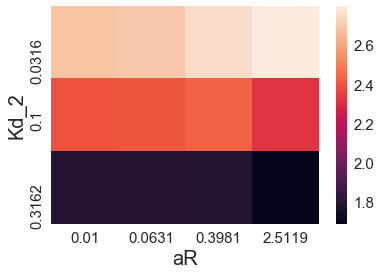

In [25]:
df_subset = df_L2_gt_L1.loc[(df_L2_gt_L1['aL_1'] == a_vals[3])] 

# in the table, the three variables that I was changing (ranging) were Kd_2, aR, and aL_1/aL_2 (though aL_1=aL_2). 
#all other vars were fixed to a single number rather than a range of values. 
# since our heat map is 2D, we only want two of those variables changing so let us set aL_1 to one of its values (we can change this value and experiment and see what would happen)
# therefore, now in df_subset, only two params are changing/ranging: Kd_2 and aR

df_subset

print(a_vals[3])
#PLAY AROUND W WHAT VALUE YOU FIX 

df_subset['gR'] = np.log(2) / df_subset['gR'] #converts into gR halflife; dont have to do this 

#did not fix aR and gR that we are using on the 2d Heat map; changing the params that you can fix; went through different pairs of params in the heat maps 

# pandas pivot
heatmap_data = pd.pivot_table(df_subset, values='N_fold_change', 
                     index=['Kd_2'], 
                     columns='aR')
df_subset
sns.heatmap(heatmap_data)

#white squares means sys has not reached steady state

varies by Kd_2 because low Kd_2 means high affinity of Dll4 ligand and Notch 1 receptor --> high fold diff

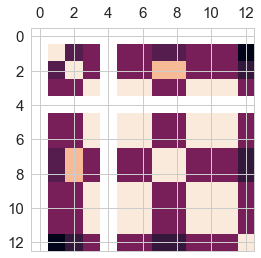

In [26]:
plt.matshow(df_L2_gt_L1.corr());
plt.show();

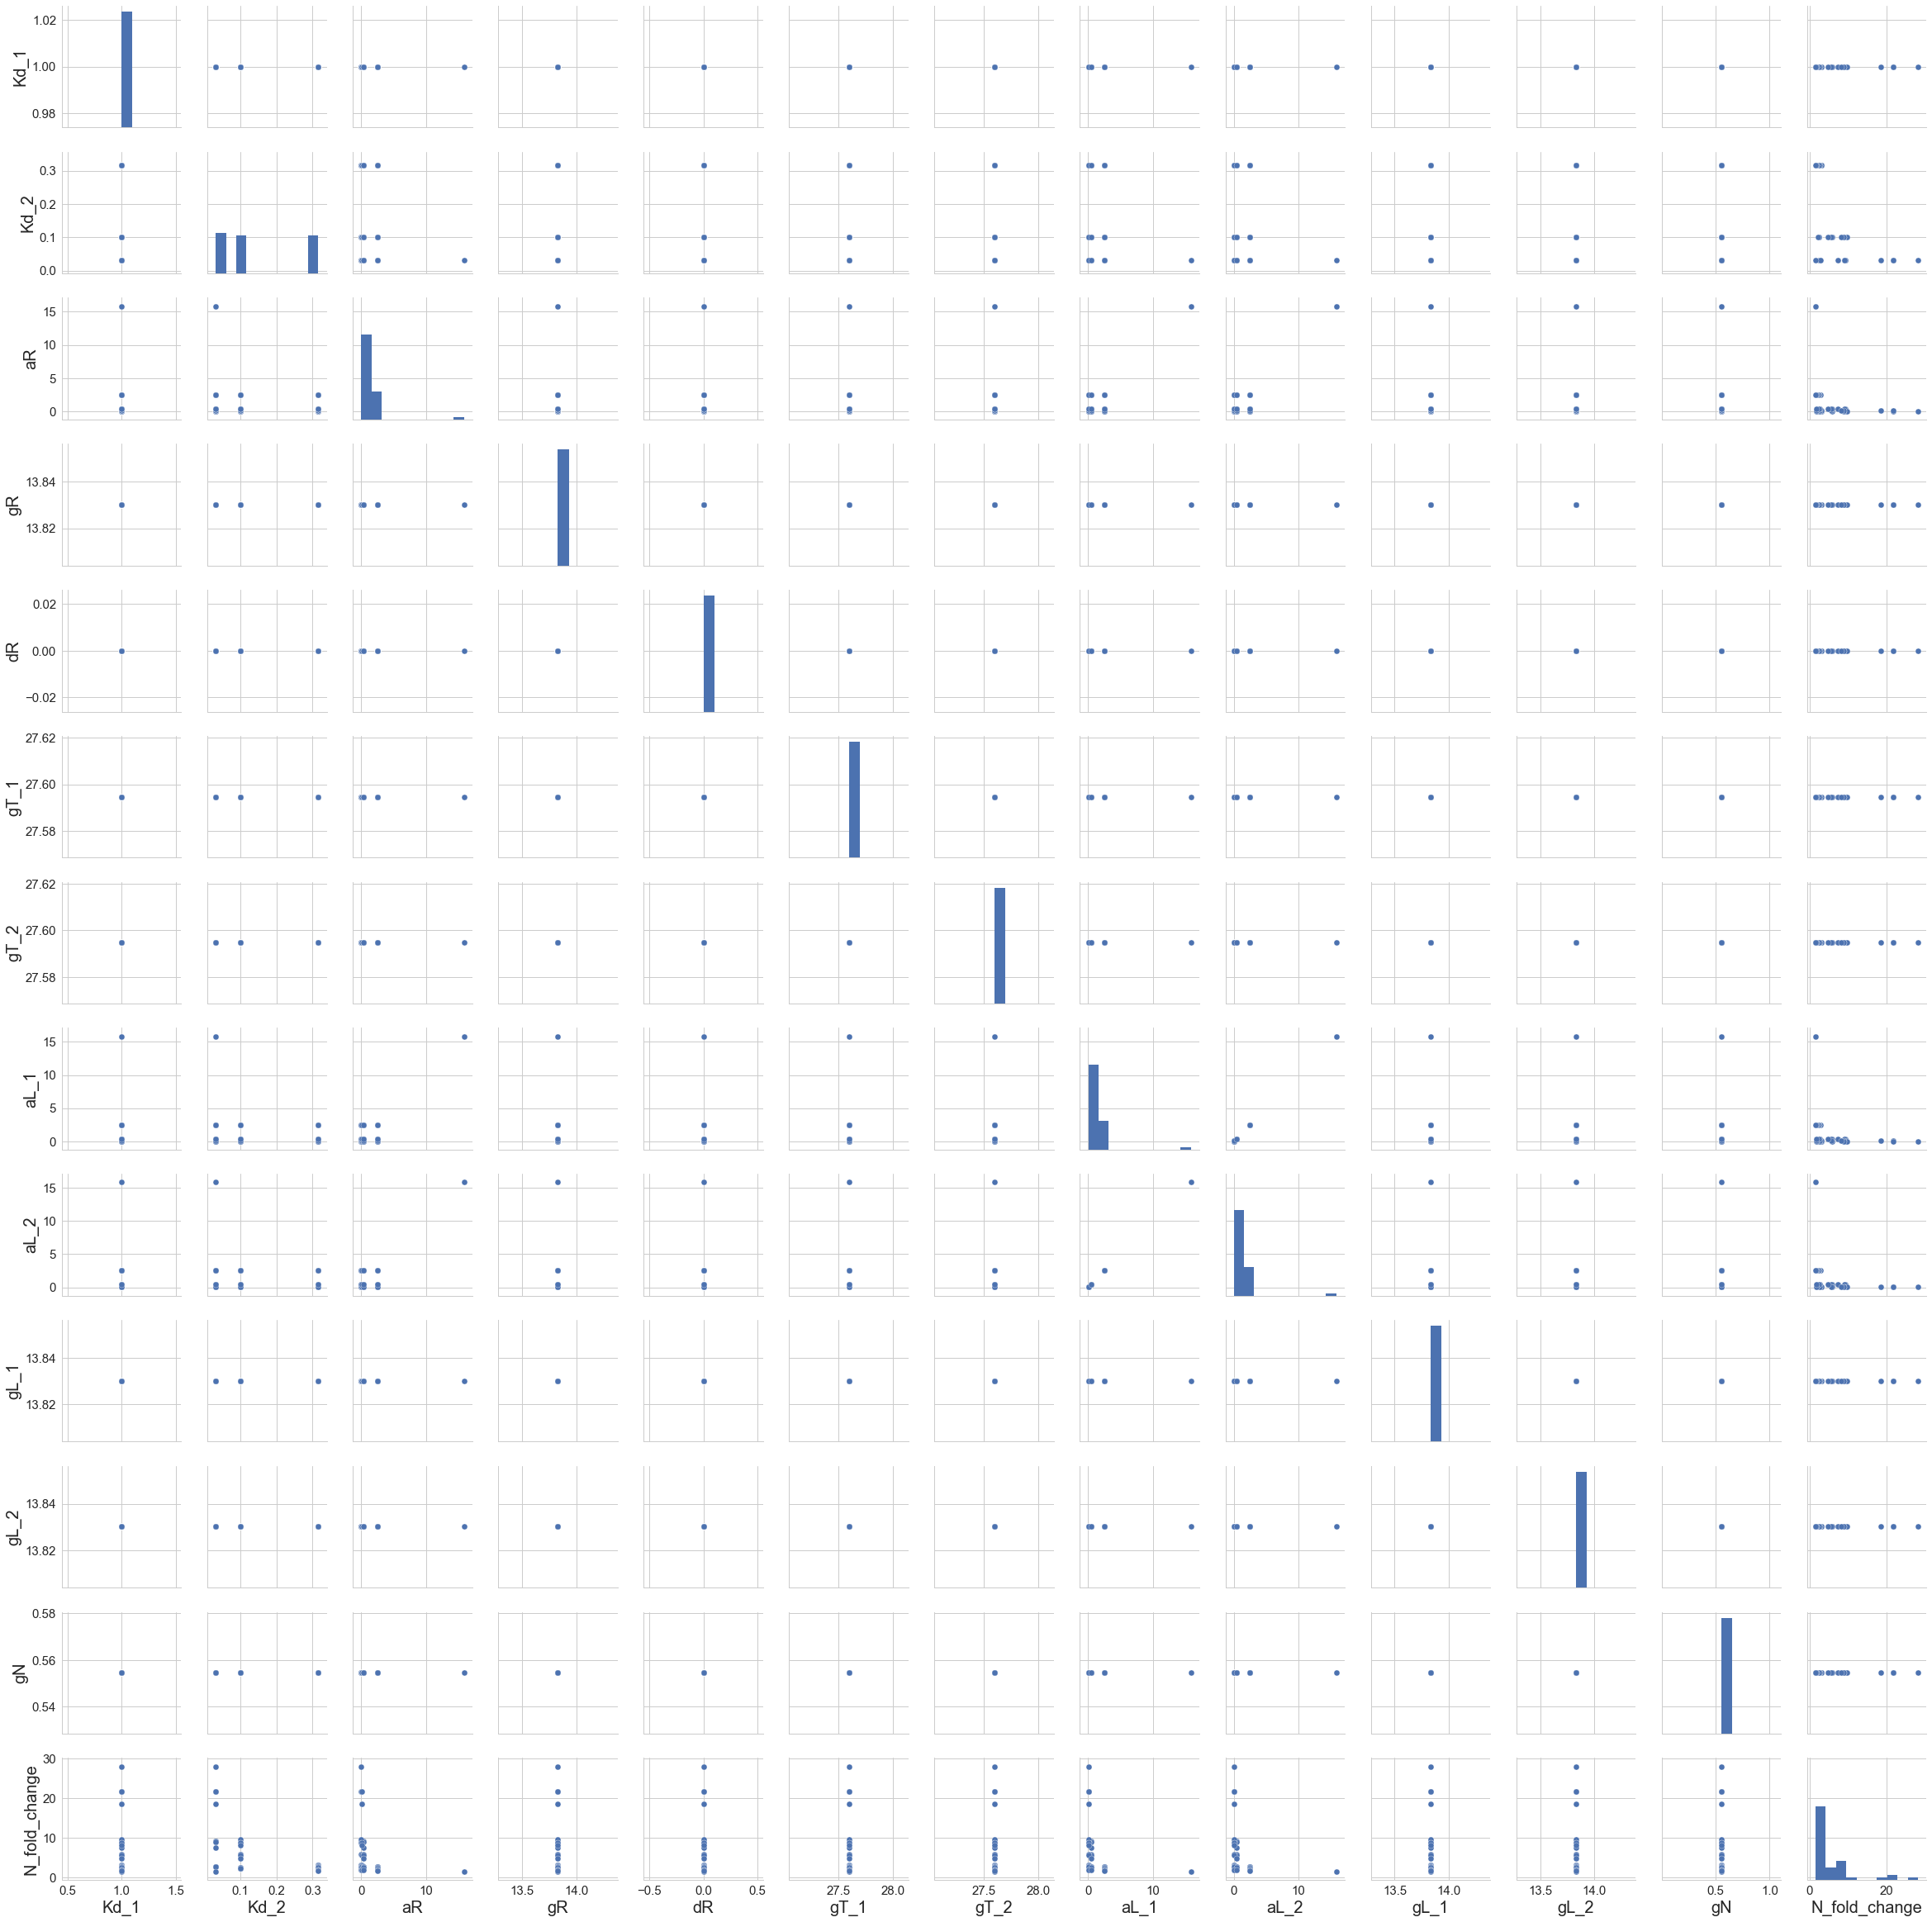

In [27]:
sns.pairplot(df_L2_gt_L1);
plt.show()

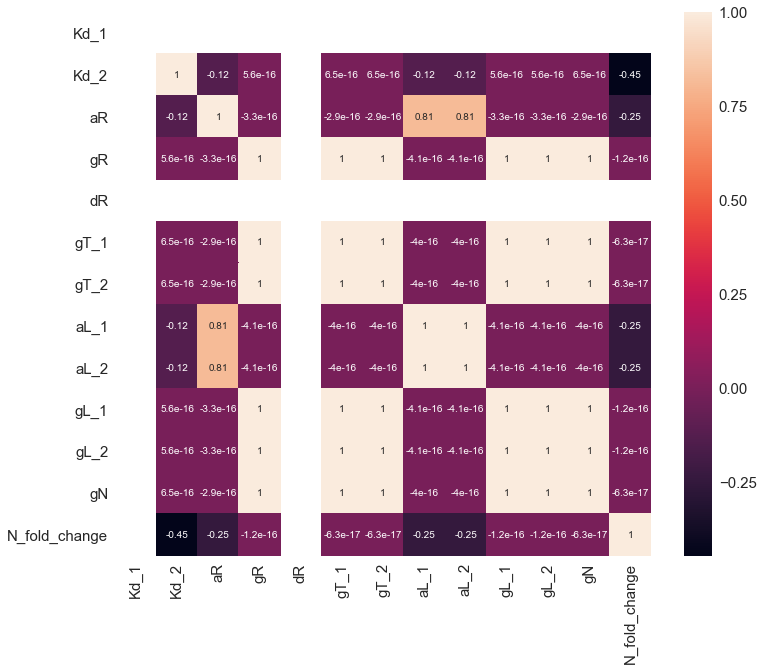

In [28]:
corrMatrix = df_L2_gt_L1.corr()
fig, ax = plt.subplots(figsize=(12,10)) 
sns.heatmap(corrMatrix, annot=True, ax=ax)
plt.show()

#pull out the values we varied

$Kd_2$ showed the most negative correlation to N_fold_change. 

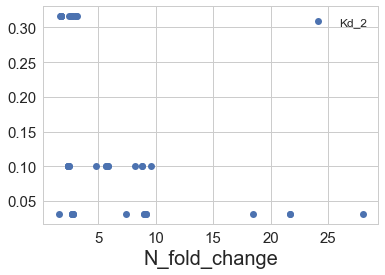

In [41]:
df_L2_gt_L1.plot(x='N_fold_change', y='Kd_2', style='o')

Smaller $Kd$ values mean less dissociation into free ligand & receptor and more stimulated lignad-receptor complex. 

In the data above we can see that there is a clear correlation between lower $Kd_2$ values and increased fold change (steady state [N activated by D114] over steady state [N activated by Dll1]). $Kd_2$ refers to the dissociation constant of the Notch1-Dll4 ligand. 

\begin{align}
    T\overset{Kd_2}{\large\rightleftharpoons} R + L_2
\end{align}

So, it makes sense that as $K_2$ decreases, there are higher levels of stimulated ligand-receptor complexes $T$ and thus leading to more activation of N by Dll4. Since Dll1's $Kd_1$ stays the same, its signaling amplitude doesn't change. Since the signaling amplitude of Dll4 increases by Dll1's doesn't, the N fold change increases. 

0.3981


/Users/catherineko/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


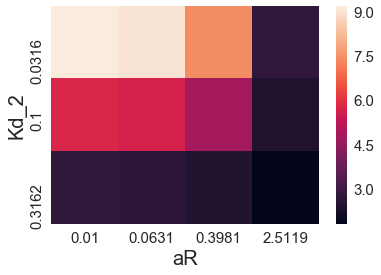

In [42]:
df_subset = df_L2_gt_L1.loc[(df_L2_gt_L1['aL_1'] == a_vals[2])] 

print(a_vals[2])

# in the table, the three variables that I was changing (ranging) were Kd_2, aR, and aL_1/aL_2 (though aL_1=aL_2). 
#all other vars were fixed to a single number rather than a range of values. 
# since our heat map is 2D, we only want two of those variables changing so let us set aL_1 to one of its values (we can change this value and experiment and see what would happen)
# therefore, now in df_subset, only two params are changing/ranging: Kd_2 and aR

df_subset['gR'] = np.log(2) / df_subset['gR'] #converts into gR halflife; dont have to do this 

#did not fix aR and gR that we are using on the 2d Heat map; changing the params that you can fix; went through different pairs of params in the heat maps 

# pandas pivot
heatmap_data = pd.pivot_table(df_subset, values='N_fold_change', 
                     index=['Kd_2'], 
                     columns='aR')
df_subset
sns.heatmap(heatmap_data)



0.0631


/Users/catherineko/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


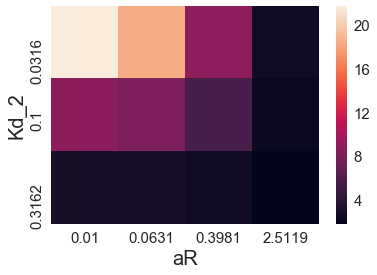

In [43]:
df_subset = df_L2_gt_L1.loc[(df_L2_gt_L1['aL_1'] == a_vals[1])] 

print(a_vals[1])

# in the table, the three variables that I was changing (ranging) were Kd_2, aR, and aL_1/aL_2 (though aL_1=aL_2). 
#all other vars were fixed to a single number rather than a range of values. 
# since our heat map is 2D, we only want two of those variables changing so let us set aL_1 to one of its values (we can change this value and experiment and see what would happen)
# therefore, now in df_subset, only two params are changing/ranging: Kd_2 and aR

df_subset['gR'] = np.log(2) / df_subset['gR'] #converts into gR halflife; dont have to do this 

#did not fix aR and gR that we are using on the 2d Heat map; changing the params that you can fix; went through different pairs of params in the heat maps 

# pandas pivot
heatmap_data = pd.pivot_table(df_subset, values='N_fold_change', 
                     index=['Kd_2'], 
                     columns='aR')
df_subset
sns.heatmap(heatmap_data)




#### When aR is similar to aL values, the fold difference is higher.

In places where aR matches the aL_1, the fold difference is higher.

0.3981


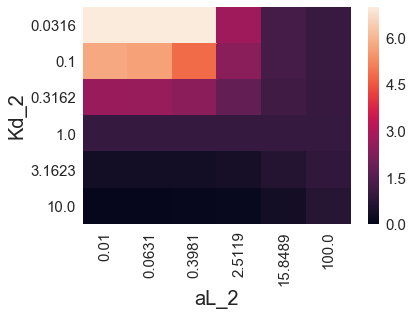

In [44]:
df_subset = df_grid.loc[(df_grid['aR'] == a_vals[2])]

print(a_vals[2])

#PLAY AROUND W DF_GRID

# I think dependence on aR == aL equivalence is only true for certain gR values. try gR = g_vals[3] vs [1]

# pandas pivot
heatmap_data = pd.pivot_table(df_subset, values='N_fold_change', 
                     index=['Kd_2'], 
                     columns='aL_2')


sns.heatmap(heatmap_data, vmin = 0, vmax = 7.)

Like above, fold difference varies with $Kd_2$. 

seems like there is a high fold difference when there is low production rate of the ligands up until ligand production rate = receptor production rate (printed). when the production rate of ligand is too high on the right, there is more ligand than receptor and the receptor becomes the limiting factor for forming ligand-receptor complexes. Howevever, since both ligands are going through that, I'm not sure why there is a decrease in the fold DIFFERENCE... 

0.1


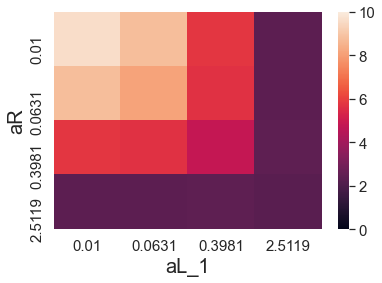

In [24]:
df_subset = df_L2_gt_L1.loc[(df_L2_gt_L1['Kd_2'] == Kd2_vals[1])]
print(Kd2_vals[1])
# I think dependence on aR == aL equivalence is only true for certain gR values. try gR = g_vals[3] vs [1]

# pandas pivot
heatmap_data = pd.pivot_table(df_subset, values='N_fold_change', 
                     index=['aR'], 
                     columns='aL_1')


sns.heatmap(heatmap_data, vmin = 0, vmax = 10)
#sns.heatmap(heatmap_data, vmin = 0, vmax = 7.)

In [ ]:
change the amount of receptor in complex with ligand - diff Kdvals 

In [28]:
df_subset

,Kd_1,Kd_2,aR,gR,dR,gT_1,gT_2,aL_1,aL_2,gL_1,gL_2,gN,N_fold_change
36,1,0.1,0.0100,13.8301,0,27.5947,27.5947,0.0100,0.0100,13.8301,13.8301,0.5545,9.6304
37,1,0.1,0.0100,13.8301,0,27.5947,27.5947,0.0631,0.0631,13.8301,13.8301,0.5545,8.7891
38,1,0.1,0.0100,13.8301,0,27.5947,27.5947,0.3981,0.3981,13.8301,13.8301,0.5545,5.8073
39,1,0.1,0.0100,13.8301,0,27.5947,27.5947,2.5119,2.5119,13.8301,13.8301,0.5545,2.3984
42,1,0.1,0.0631,13.8301,0,27.5947,27.5947,0.0100,0.0100,13.8301,13.8301,0.5545,8.7891
43,1,0.1,0.0631,13.8301,0,27.5947,27.5947,0.0631,0.0631,13.8301,13.8301,0.5545,8.1618
44,1,0.1,0.0631,13.8301,0,27.5947,27.5947,0.3981,0.3981,13.8301,13.8301,0.5545,5.6697
45,1,0.1,0.0631,13.8301,0,27.5947,27.5947,2.5119,2.5119,13.8301,13.8301,0.5545,2.4032
48,1,0.1,0.3981,13.8301,0,27.5947,27.5947,0.0100,0.0100,13.8301,13.8301,0.5545,5.8073
49,1,0.1,0.3981,13.8301,0,27.5947,27.5947,0.0631,0.0631,13.8301,13.8301,0.5545,5.6697


0.3162


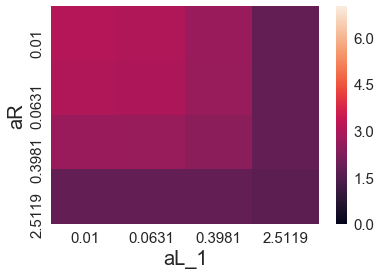

In [47]:
df_subset = df_L2_gt_L1.loc[(df_L2_gt_L1['Kd_2'] == Kd2_vals[2])]
print(Kd2_vals[2])
# I think dependence on aR == aL equivalence is only true for certain gR values. try gR = g_vals[3] vs [1]

# pandas pivot
heatmap_data = pd.pivot_table(df_subset, values='N_fold_change', 
                     index=['aR'], 
                     columns='aL_1')


sns.heatmap(heatmap_data, vmin = 0, vmax = 7.)

fold difference is higher when both aR and aL_1 are small

looks like whenever aR=aL_1, the fold difference is lower...so that means that when both ligands and the receptor are being produced at the same rates, either Dll1 binds more strongly than usual or Dll4 binds weaker than usual to form the ligand-receptor complexes.

# Make new dataset with aR, gR, gL_1, and gL_2 changing

In [48]:
np.logspace(-2, 2, num=6, base=10.0)

array([1.00000000e-02, 6.30957344e-02, 3.98107171e-01, 2.51188643e+00,
       1.58489319e+01, 1.00000000e+02])

In [49]:
#%%time
# Fixed values ??? we non-dimensionalized to Kd_1. every concentration that is non-dimensionalized is a ratio to this Kd_1!
Kd_1 = 1
dR = 0 #assuming no leaky activation 
gN = np.log(2) / 1.25 # 1.25 h = 75 min #measured experimentally 

# Define variable param ranges; when playing around fix some of these param values to a single number!! 
'''
Kd2_vals = np.logspace(-1.5, 1., num=6, base=10.0) 
a_vals = np.logspace(-2, 2, num=6, base=10.0) # eventually expand to -3 to +3 #range of basal production for all cells ; same RANGE for all cells
g_vals = np.log(2) / np.logspace(-1.3, .7, num=6, base=10.0)  
gT_vals = np.log(2) / np.logspace(-1.6, 0.1, num=5, base=10.0) 
'''


Kd2_vals = [0.1, 10]
a_vals = np.around(np.logspace(-2, 2, num=6, base=10.0),decimals=4)
g_vals = np.log(2) / np.logspace(-1.3, .7, num=6, base=10.0)  
#gT_vals = np.log(2) / np.logspace(-1.6, 0.1, num=5, base=10.0) 
aL_1=.01
aL_2=aL_1

# control production rates but not endocytosis bc those are diff 
#gR = 13.8301 # some value from g_vals to represent th rate of basal endocytosis of the single receptor R
#gL_1 = 13.8301 #some value from g_vals to represent the rate of basal endocytosis of the Dll1 ligand
#gL_2 = 13.8301 #some value from g_vals to represent the rate of basal endocytosis of the Dll4 ligand 

#range of values for the rate of endocytosis of stimulated ligand (i.e. ligand-receptor complex T) is different from
# the range of values for the surface endocytosis free ligand rate 
gT_1 = 27.5947 #some value from gT_vals (gamma T represent rate of activation of T_1 complex)
gT_2 = 27.5947 # some value from gT_vals (gamma T represent rate of activation of T_2 complex)

param_sets = []

#filling param set with all of the combos of all of the ranges of the parameters ^ ; interested in param sets that give large fold change between Notch1-Dll1 and Notch1-Dll4


for gR in g_vals:
    for gL_1 in g_vals:
        for gL_2 in g_vals:
            for aR in a_vals: 
                for Kd_2 in Kd2_vals:#  WE WANT PRODUCTION RATE OF LIGANDS TO BE THE SAME FOR Dll1 and Dll4
                    param_sets.append((Kd_1, Kd_2, aR, gR, dR, 
                                        gT_1, gT_2, aL_1, aL_2, 
                                        gL_1, gL_2, gN))

                                

len(param_sets)

2592

In [50]:
# Run simulation

# Define time series parameters
duration = 50 # simulation duration in hr
interval = 5 # time step in minutes

# For us to say the system is at steady state,
# the change in variable values must be < 1 % 
# in final hour of simulation
convergence_crit = 1

results = []


In [51]:
%%time

# Run simulation

# Define time series parameters
duration = 50 # simulation duration in hr
interval = 5 # time step in minutes

# For us to say the system is at steady state,
# the change in variable values must be < 1 % 
# in final hour of simulation
convergence_crit = 1

results = []

for i, full_params in enumerate(param_sets):
    
    Kd_1, Kd_2, aR, gR, dR, gT_1, gT_2, aL_1, aL_2, gL_1, gL_2, gN = full_params

    params_1 = (Kd_1, aR, gR, dR, gT_1, aL_1, gL_1, gN) #notch 1 Dll1
    params_2 = (Kd_2, aR, gR, dR, gT_2, aL_2, gL_2, gN) #notch 1 Dll4
# why are computing two versions?? fold difference between what???? 2 different ligands with their own diff params. comparing the activation of each. fold difference of the steady state of N
    RLNT_1, RLNT_2, t, N_fold_change = \
            compare_param_sets(params_1, params_2, duration, interval, convergence_crit)
    
    results.append((*full_params, N_fold_change)) #what is this star ??? * UNPACKS ARRAY; otherwise it would be a list of an array and float.

# Store results in dataframe

df_grid = pd.DataFrame(results)
df_grid.columns = ['Kd_1', 'Kd_2', 'aR', 'gR', 'dR', 
                   'gT_1', 'gT_2', 'aL_1', 'aL_2', 
                   'gL_1', 'gL_2', 'gN', 'N_fold_change']
df_grid.head()

CPU times: user 27.7 s, sys: 162 ms, total: 27.9 s
Wall time: 30.1 s


In [52]:
%%time 
# Save data in csv

filename = '/Users/catherineko/Desktop/FSRI/Research/2020-07-18_somegs_output.csv'

df_grid.to_csv(filename, sep = ',', index=False)

CPU times: user 64.5 ms, sys: 7.41 ms, total: 72 ms
Wall time: 71.6 ms


In [53]:
# Read in data from stored file -- why did you have to reread in the file if we made it up there^^???

file = '/Users/catherineko/Desktop/FSRI/Research/2020-07-18_somegs_output.csv'
df_grid = pd.read_csv(file)
df_grid.head()

# Round values in table for comparison

for col in df_grid.columns:
    df_grid[col] = np.around(df_grid[col], decimals = 4)
df_grid.head()

,Kd_1,Kd_2,aR,gR,dR,gT_1,gT_2,aL_1,aL_2,gL_1,gL_2,gN,N_fold_change
0,1,0.1,0.0100,13.8301,0,27.5947,27.5947,0.01,0.01,13.8301,13.8301,0.5545,9.6304
1,1,10.0,0.0100,13.8301,0,27.5947,27.5947,0.01,0.01,13.8301,13.8301,0.5545,0.1004
2,1,0.1,0.0631,13.8301,0,27.5947,27.5947,0.01,0.01,13.8301,13.8301,0.5545,8.7891
3,1,10.0,0.0631,13.8301,0,27.5947,27.5947,0.01,0.01,13.8301,13.8301,0.5545,0.1014
4,1,0.1,0.3981,13.8301,0,27.5947,27.5947,0.01,0.01,13.8301,13.8301,0.5545,5.8073


In [54]:
# Check that there are no negative values

df_grid.loc[df_grid['N_fold_change']<0]

,Kd_1,Kd_2,aR,gR,dR,gT_1,gT_2,aL_1,aL_2,gL_1,gL_2,gN,N_fold_change


### Examine parameter sets for which N fold change > 1.5

In [55]:
df_L2_gt_L1 = df_grid.loc[df_grid['N_fold_change']>1.5]
df_L2_gt_L1.head()

,Kd_1,Kd_2,aR,gR,dR,gT_1,gT_2,aL_1,aL_2,gL_1,gL_2,gN,N_fold_change
0,1,0.1,0.0100,13.8301,0,27.5947,27.5947,0.01,0.01,13.8301,13.8301,0.5545,9.6304
2,1,0.1,0.0631,13.8301,0,27.5947,27.5947,0.01,0.01,13.8301,13.8301,0.5545,8.7891
4,1,0.1,0.3981,13.8301,0,27.5947,27.5947,0.01,0.01,13.8301,13.8301,0.5545,5.8073
6,1,0.1,2.5119,13.8301,0,27.5947,27.5947,0.01,0.01,13.8301,13.8301,0.5545,2.3984
12,1,0.1,0.0100,13.8301,0,27.5947,27.5947,0.01,0.01,13.8301,5.5059,0.5545,22.8070


In [56]:
'''
ADDED THIS WHEN WE INITIALIZED THE VARS ALREADY

# Define variable param ranges; redefine to make them exactly four decimal places

Kd2_vals = np.around(np.logspace(-1.5, 1., num=6, base=10.0), decimals=4) 
#a_vals = np.around(np.logspace(-2, 2, num=6, base=10.0), decimals=4) # eventually expand to -3 to +3
#g_vals = np.around(np.log(2) / np.logspace(-1.3, .7, num=6, base=10.0), decimals=4) 
#gT_vals = np.around(np.log(2) / np.logspace(-1.6, 0.1, num=5, base=10.0), decimals=4)

df_L2_gt_L1

'''

'\nADDED THIS WHEN WE INITIALIZED THE VARS ALREADY\n\n# Define variable param ranges; redefine to make them exactly four decimal places\n\nKd2_vals = np.around(np.logspace(-1.5, 1., num=6, base=10.0), decimals=4) \n#a_vals = np.around(np.logspace(-2, 2, num=6, base=10.0), decimals=4) # eventually expand to -3 to +3\n#g_vals = np.around(np.log(2) / np.logspace(-1.3, .7, num=6, base=10.0), decimals=4) \n#gT_vals = np.around(np.log(2) / np.logspace(-1.6, 0.1, num=5, base=10.0), decimals=4)\n\ndf_L2_gt_L1\n\n'

## aR vs. gR

In [57]:
df_grid.head()

,Kd_1,Kd_2,aR,gR,dR,gT_1,gT_2,aL_1,aL_2,gL_1,gL_2,gN,N_fold_change
0,1,0.1,0.0100,13.8301,0,27.5947,27.5947,0.01,0.01,13.8301,13.8301,0.5545,9.6304
1,1,10.0,0.0100,13.8301,0,27.5947,27.5947,0.01,0.01,13.8301,13.8301,0.5545,0.1004
2,1,0.1,0.0631,13.8301,0,27.5947,27.5947,0.01,0.01,13.8301,13.8301,0.5545,8.7891
3,1,10.0,0.0631,13.8301,0,27.5947,27.5947,0.01,0.01,13.8301,13.8301,0.5545,0.1014
4,1,0.1,0.3981,13.8301,0,27.5947,27.5947,0.01,0.01,13.8301,13.8301,0.5545,5.8073


In [58]:
g_vals[1]

5.5058637633829415

,Kd_1,Kd_2,aR,gR,dR,gT_1,gT_2,aL_1,aL_2,gL_1,gL_2,gN,N_fold_change
84,1,0.1,0.0100,13.8301,0,27.5947,27.5947,0.01,0.01,5.5059,5.5059,0.5545,9.1385
85,1,10.0,0.0100,13.8301,0,27.5947,27.5947,0.01,0.01,5.5059,5.5059,0.5545,0.1010
86,1,0.1,0.0631,13.8301,0,27.5947,27.5947,0.01,0.01,5.5059,5.5059,0.5545,7.5105
87,1,10.0,0.0631,13.8301,0,27.5947,27.5947,0.01,0.01,5.5059,5.5059,0.5545,0.1035
88,1,0.1,0.3981,13.8301,0,27.5947,27.5947,0.01,0.01,5.5059,5.5059,0.5545,3.8360


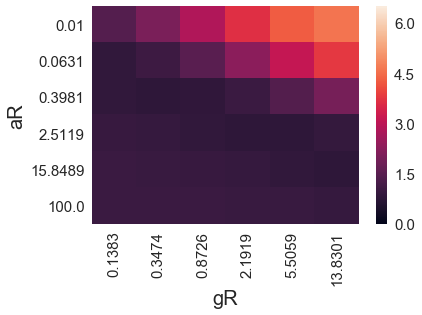

In [59]:
df_subset = df_grid.loc[(df_grid['gL_1'] == np.around(g_vals[1],decimals=4)) &\
                           (df_grid['gL_2'] == np.around(g_vals[1],decimals=4))]

# I HAD A ROUNDING ERROR ^ BUT FIXED W NP.AROUND

# I think dependence on aR == aL equivalence is only true for certain gR values. try gR = g_vals[3] vs [1]

# pandas pivot
heatmap_data = pd.pivot_table(df_subset, values='N_fold_change', 
                     index=['aR'], 
                     columns='gR')


sns.heatmap(heatmap_data, vmin = 0, vmax = 6.5)
df_subset.head()        

,Kd_1,Kd_2,aR,gR,dR,gT_1,gT_2,aL_1,aL_2,gL_1,gL_2,gN,N_fold_change
85,1,10.0,0.0100,13.8301,0,27.5947,27.5947,0.01,0.01,5.5059,5.5059,0.5545,0.1010
87,1,10.0,0.0631,13.8301,0,27.5947,27.5947,0.01,0.01,5.5059,5.5059,0.5545,0.1035
89,1,10.0,0.3981,13.8301,0,27.5947,27.5947,0.01,0.01,5.5059,5.5059,0.5545,0.1195
91,1,10.0,2.5119,13.8301,0,27.5947,27.5947,0.01,0.01,5.5059,5.5059,0.5545,0.2083
93,1,10.0,15.8489,13.8301,0,27.5947,27.5947,0.01,0.01,5.5059,5.5059,0.5545,0.5167


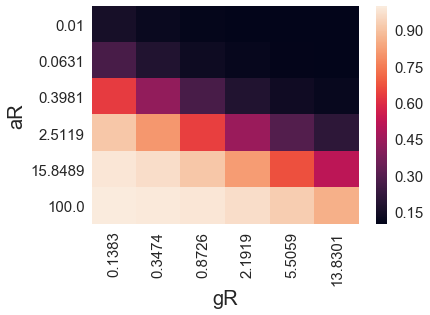

In [60]:
df_subset = df_grid.loc[(df_grid['gL_1'] == np.around(g_vals[1],decimals=4)) &\
                           (df_grid['gL_2'] == np.around(g_vals[1],decimals=4)) &\
                           (df_grid['Kd_2'] == 10)]

# I HAD A ROUNDING ERROR ^ BUT FIXED W NP.AROUND

# I think dependence on aR == aL equivalence is only true for certain gR values. try gR = g_vals[3] vs [1]

# pandas pivot
heatmap_data = pd.pivot_table(df_subset, values='N_fold_change', 
                     index=['aR'], 
                     columns='gR')


sns.heatmap(heatmap_data)
#, vmin = 0, vmax = 6.5
df_subset.head()        

Kd_2 = 10: higher fold differences are correlated with high rate of receptor production and low rate of receptor endocytosis 


Kd_2 = 0.1: higher fold diff correlated with high rates of receptor endocytosis but low rates of receptor production

,Kd_1,Kd_2,aR,gR,dR,gT_1,gT_2,aL_1,aL_2,gL_1,gL_2,gN,N_fold_change
444,1,0.1,0.0100,5.5059,0,27.5947,27.5947,0.01,0.01,13.8301,5.5059,0.5545,20.9649
445,1,10.0,0.0100,5.5059,0,27.5947,27.5947,0.01,0.01,13.8301,5.5059,0.5545,0.2528
446,1,0.1,0.0631,5.5059,0,27.5947,27.5947,0.01,0.01,13.8301,5.5059,0.5545,14.7632
447,1,10.0,0.0631,5.5059,0,27.5947,27.5947,0.01,0.01,13.8301,5.5059,0.5545,0.2571
448,1,0.1,0.3981,5.5059,0,27.5947,27.5947,0.01,0.01,13.8301,5.5059,0.5545,5.5069


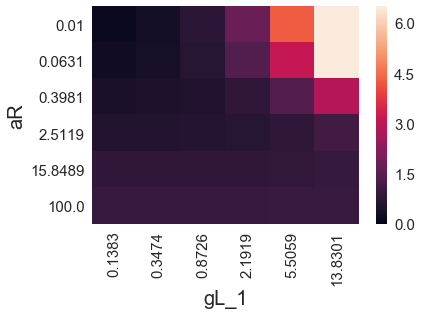

In [61]:
df_subset = df_grid.loc[(df_grid['gR'] == np.around(g_vals[1],decimals=4)) &\
                           (df_grid['gL_2'] == np.around(g_vals[1],decimals=4))]

# I HAD A ROUNDING ERROR ^ BUT FIXED W NP.AROUND

# I think dependence on aR == aL equivalence is only true for certain gR values. try gR = g_vals[3] vs [1]

# pandas pivot
heatmap_data = pd.pivot_table(df_subset, values='N_fold_change', 
                     index=['aR'], 
                     columns='gL_1')


sns.heatmap(heatmap_data, vmin = 0, vmax = 6.5)
df_subset.head()        

high fold diff is correlated with HIGH endocytosis rate of Dll1. 
    makes sense because as the Dll1 is being degraded faster, less Notch1-Dll1 complex 

high fold diff is correlated with LOW prodction rate of receptor

,Kd_1,Kd_2,aR,gR,dR,gT_1,gT_2,aL_1,aL_2,gL_1,gL_2,gN,N_fold_change
505,1,10.0,0.0100,5.5059,0,27.5947,27.5947,0.01,0.01,5.5059,13.8301,0.5545,0.0406
507,1,10.0,0.0631,5.5059,0,27.5947,27.5947,0.01,0.01,5.5059,13.8301,0.5545,0.0428
509,1,10.0,0.3981,5.5059,0,27.5947,27.5947,0.01,0.01,5.5059,13.8301,0.5545,0.0564
511,1,10.0,2.5119,5.5059,0,27.5947,27.5947,0.01,0.01,5.5059,13.8301,0.5545,0.1344
513,1,10.0,15.8489,5.5059,0,27.5947,27.5947,0.01,0.01,5.5059,13.8301,0.5545,0.4314


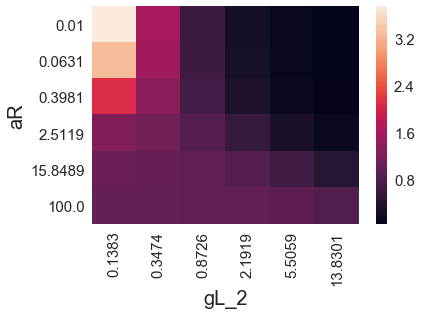

In [62]:
df_subset = df_grid.loc[(df_grid['gR'] == np.around(g_vals[1],decimals=4)) &\
                           (df_grid['gL_1'] == np.around(g_vals[1],decimals=4)) &\
                           (df_grid['Kd_2'] == 10)]

# I HAD A ROUNDING ERROR ^ BUT FIXED W NP.AROUND

# I think dependence on aR == aL equivalence is only true for certain gR values. try gR = g_vals[3] vs [1]

# pandas pivot
heatmap_data = pd.pivot_table(df_subset, values='N_fold_change', 
                     index=['aR'], 
                     columns='gL_2')


sns.heatmap(heatmap_data)
#, vmin = 0, vmax = 6.5
df_subset.head()        

low endocytosis rate of Dll4--> more Notch1-Dll4 complexes --> high fold diff 

low production of receptor --> high fold diff (seems like maybe when Dll1 and Dll4 compete for limited receptors, Dll4 affinity > Dll1 affinity to receptor

,Kd_1,Kd_2,aR,gR,dR,gT_1,gT_2,aL_1,aL_2,gL_1,gL_2,gN,N_fold_change
434,1,0.1,0.0631,5.5059,0,27.5947,27.5947,0.01,0.01,13.8301,13.8301,0.5545,7.8834
446,1,0.1,0.0631,5.5059,0,27.5947,27.5947,0.01,0.01,13.8301,5.5059,0.5545,14.7632
458,1,0.1,0.0631,5.5059,0,27.5947,27.5947,0.01,0.01,13.8301,2.1919,0.5545,22.9391
470,1,0.1,0.0631,5.5059,0,27.5947,27.5947,0.01,0.01,13.8301,0.8726,0.5545,29.7788
482,1,0.1,0.0631,5.5059,0,27.5947,27.5947,0.01,0.01,13.8301,0.3474,0.5545,33.9799


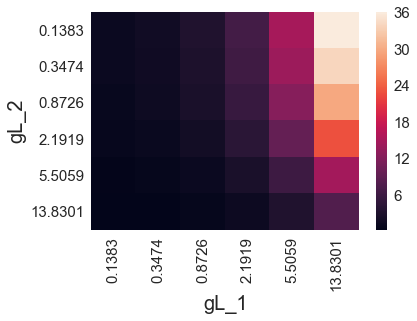

In [63]:
df_subset = df_grid.loc[(df_grid['gR'] == np.around(g_vals[1],decimals=4)) &\
                           (df_grid['aR'] == np.around(a_vals[1],decimals=4))&\
                           (df_grid['Kd_2'] == .1)]

# I HAD A ROUNDING ERROR ^ BUT FIXED W NP.AROUND

# I think dependence on aR == aL equivalence is only true for certain gR values. try gR = g_vals[3] vs [1]

# pandas pivot
heatmap_data = pd.pivot_table(df_subset, values='N_fold_change', 
                     index=['gL_2'], 
                     columns='gL_1')


sns.heatmap(heatmap_data)
#, vmin = 0, vmax = 6.5
df_subset.head()        

,Kd_1,Kd_2,aR,gR,dR,gT_1,gT_2,aL_1,aL_2,gL_1,gL_2,gN,N_fold_change
15,1,10.0,0.0631,13.8301,0,27.5947,27.5947,0.01,0.01,13.8301,5.5059,0.5545,0.2541
87,1,10.0,0.0631,13.8301,0,27.5947,27.5947,0.01,0.01,5.5059,5.5059,0.5545,0.1035
159,1,10.0,0.0631,13.8301,0,27.5947,27.5947,0.01,0.01,2.1919,5.5059,0.5545,0.0436
231,1,10.0,0.0631,13.8301,0,27.5947,27.5947,0.01,0.01,0.8726,5.5059,0.5545,0.0197
303,1,10.0,0.0631,13.8301,0,27.5947,27.5947,0.01,0.01,0.3474,5.5059,0.5545,0.0101


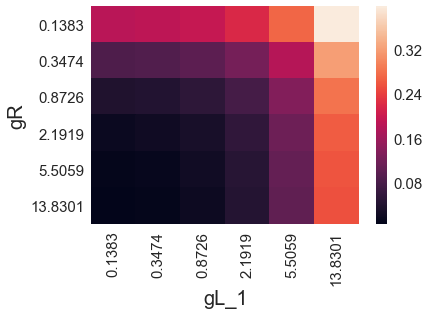

In [64]:
df_subset = df_grid.loc[(df_grid['aR'] == np.around(a_vals[1],decimals=4)) &\
                           (df_grid['gL_2'] == np.around(g_vals[1],decimals=4))&\
                           (df_grid['Kd_2'] == 10)]

# I HAD A ROUNDING ERROR ^ BUT FIXED W NP.AROUND

# I think dependence on aR == aL equivalence is only true for certain gR values. try gR = g_vals[3] vs [1]

# pandas pivot
heatmap_data = pd.pivot_table(df_subset, values='N_fold_change', 
                     index=['gR'], 
                     columns='gL_1')


sns.heatmap(heatmap_data)
df_subset.head()        

high endocytosis of Dll1--> less Dll1 available to form Notch1-Dll1 complexes --> high fold diff

high endocytosis of receptor --> less surface receptors available --> high fold diff

,Kd_1,Kd_2,aR,gR,dR,gT_1,gT_2,aL_1,aL_2,gL_1,gL_2,gN,N_fold_change
74,1,0.1,0.0631,13.8301,0,27.5947,27.5947,0.01,0.01,5.5059,13.8301,0.5545,3.5809
86,1,0.1,0.0631,13.8301,0,27.5947,27.5947,0.01,0.01,5.5059,5.5059,0.5545,7.5105
98,1,0.1,0.0631,13.8301,0,27.5947,27.5947,0.01,0.01,5.5059,2.1919,0.5545,13.4735
110,1,0.1,0.0631,13.8301,0,27.5947,27.5947,0.01,0.01,5.5059,0.8726,0.5545,19.9817
122,1,0.1,0.0631,13.8301,0,27.5947,27.5947,0.01,0.01,5.5059,0.3474,0.5545,24.9982


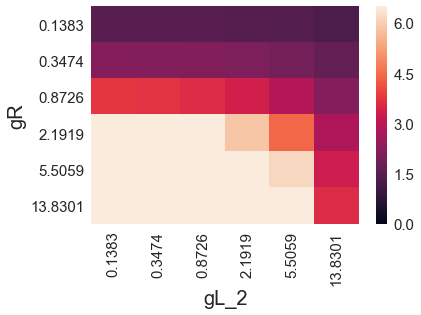

In [65]:
df_subset = df_grid.loc[(df_grid['aR'] == np.around(a_vals[1],decimals=4)) &\
                           (df_grid['gL_1'] == np.around(g_vals[1],decimals=4))&\
                           (df_grid['Kd_2'] == .1)]

# I HAD A ROUNDING ERROR ^ BUT FIXED W NP.AROUND

# I think dependence on aR == aL equivalence is only true for certain gR values. try gR = g_vals[3] vs [1]

# pandas pivot
heatmap_data = pd.pivot_table(df_subset, values='N_fold_change', 
                     index=['gR'], 
                     columns='gL_2')


sns.heatmap(heatmap_data, vmin = 0, vmax = 6.5)
df_subset.head()        

low endocytosis of Dll4 --> more Notch1-Dll4 complexes --> high fold diff

high endocytosis of receptor --> less receptor and the ligands have the compete --> Dll4 has higher affinity --> fold diff increases 

,Kd_1,Kd_2,aR,gR,dR,gT_1,gT_2,aL_1,aL_2,gL_1,gL_2,gN,N_fold_change
434,1,0.1,0.0631,5.5059,0,27.5947,27.5947,0.01,0.01,13.8301,13.8301,0.5545,7.8834
435,1,10.0,0.0631,5.5059,0,27.5947,27.5947,0.01,0.01,13.8301,13.8301,0.5545,0.1028
446,1,0.1,0.0631,5.5059,0,27.5947,27.5947,0.01,0.01,13.8301,5.5059,0.5545,14.7632
447,1,10.0,0.0631,5.5059,0,27.5947,27.5947,0.01,0.01,13.8301,5.5059,0.5545,0.2571
458,1,0.1,0.0631,5.5059,0,27.5947,27.5947,0.01,0.01,13.8301,2.1919,0.5545,22.9391


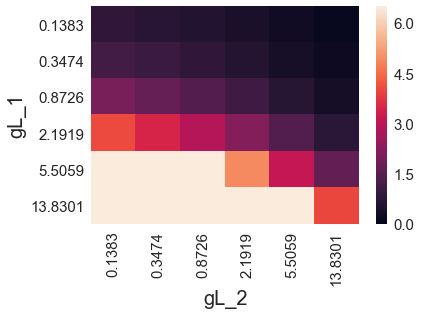

In [66]:
df_subset = df_grid.loc[(df_grid['aR'] == np.around(a_vals[1],decimals=4)) &\
                           (df_grid['gR'] == np.around(g_vals[1],decimals=4))]

# I HAD A ROUNDING ERROR ^ BUT FIXED W NP.AROUND

# I think dependence on aR == aL equivalence is only true for certain gR values. try gR = g_vals[3] vs [1]

# pandas pivot
heatmap_data = pd.pivot_table(df_subset, values='N_fold_change', 
                     index=['gL_1'], 
                     columns='gL_2')


sns.heatmap(heatmap_data, vmin = 0, vmax = 6.5)
df_subset.head()        

low endocytosis of Dll4 ligand --> more Notch1-Dll4 complexes --> higher fold diff 

high endocytosis of Dll1 --> less Notch1-Dll1 complexes --> higher fold diff

# Kd_2 and gT and gLs

In [67]:
np.log(2) / np.logspace(-1.3, .7, num=6, base=10.0) 

array([13.83010448,  5.50586376,  2.19192384,  0.8726206 ,  0.34739652,
        0.13830104])

In [68]:
#%%time
# Fixed values ??? we non-dimensionalized to Kd_1. every concentration that is non-dimensionalized is a ratio to this Kd_1!
Kd_1 = 1
dR = 0 #assuming no leaky activation 
gN = np.log(2) / 1.25 # 1.25 h = 75 min #measured experimentally 

# Define variable param ranges; when playing around fix some of these param values to a single number!! 
'''
Kd2_vals = np.logspace(-1.5, 1., num=6, base=10.0) 
a_vals = np.logspace(-2, 2, num=6, base=10.0) # eventually expand to -3 to +3 #range of basal production for all cells ; same RANGE for all cells
g_vals = np.log(2) / np.logspace(-1.3, .7, num=6, base=10.0)  
gT_vals = np.log(2) / np.logspace(-1.6, 0.1, num=5, base=10.0) 
'''

gT_vals = np.around(np.log(2) / np.logspace(-1.6, 0.1, num=5, base=10.0),decimals=4)
Kd2_vals = np.around(np.logspace(-1.5, 1., num=6, base=10.0),decimals=4)
a_vals = np.around(np.logspace(-2, 2, num=6, base=10.0),decimals=4)
g_vals = np.log(2) / np.logspace(-1.3, .7, num=6, base=10.0)  
#gT_vals = np.log(2) / np.logspace(-1.6, 0.1, num=5, base=10.0) 
aL_1=.01
aL_2=aL_1
aR=0.01
gR=13.8301

# control production rates but not endocytosis bc those are diff 
#gR = 13.8301 # some value from g_vals to represent th rate of basal endocytosis of the single receptor R
#gL_1 = 13.8301 #some value from g_vals to represent the rate of basal endocytosis of the Dll1 ligand
#gL_2 = 13.8301 #some value from g_vals to represent the rate of basal endocytosis of the Dll4 ligand 

#range of values for the rate of endocytosis of stimulated ligand (i.e. ligand-receptor complex T) is different from
# the range of values for the surface endocytosis free ligand rate 
#gT_1 = 27.5947 #some value from gT_vals (gamma T represent rate of activation of T_1 complex)
#gT_2 = 27.5947 # some value from gT_vals (gamma T represent rate of activation of T_2 complex)

param_sets = []

#filling param set with all of the combos of all of the ranges of the parameters ^ ; interested in param sets that give large fold change between Notch1-Dll1 and Notch1-Dll4


for gT_1 in gT_vals:
    for gL_1 in g_vals:
        for gL_2 in g_vals:
            for Kd_2 in Kd2_vals:
                for gT_2 in gT_vals: #  WE WANT PRODUCTION RATE OF LIGANDS TO BE THE SAME FOR Dll1 and Dll4
                    param_sets.append((Kd_1, Kd_2, aR, gR, dR, 
                                        gT_1, gT_2, aL_1, aL_2, 
                                        gL_1, gL_2, gN))

                                

len(param_sets)

5400

In [70]:
%%time

# Run simulation

# Define time series parameters
duration = 50 # simulation duration in hr
interval = 5 # time step in minutes

# For us to say the system is at steady state,
# the change in variable values must be < 1 % 
# in final hour of simulation
convergence_crit = 1

results = []

for i, full_params in enumerate(param_sets):
    
    Kd_1, Kd_2, aR, gR, dR, gT_1, gT_2, aL_1, aL_2, gL_1, gL_2, gN = full_params

    params_1 = (Kd_1, aR, gR, dR, gT_1, aL_1, gL_1, gN) #notch 1 Dll1
    params_2 = (Kd_2, aR, gR, dR, gT_2, aL_2, gL_2, gN) #notch 1 Dll4
# why are computing two versions?? fold difference between what???? 2 different ligands with their own diff params. comparing the activation of each. fold difference of the steady state of N
    RLNT_1, RLNT_2, t, N_fold_change = \
            compare_param_sets(params_1, params_2, duration, interval, convergence_crit)
    
    results.append((*full_params, N_fold_change)) #what is this star ??? * UNPACKS ARRAY; otherwise it would be a list of an array and float.

# Store results in dataframe

df_grid = pd.DataFrame(results)
df_grid.columns = ['Kd_1', 'Kd_2', 'aR', 'gR', 'dR', 
                   'gT_1', 'gT_2', 'aL_1', 'aL_2', 
                   'gL_1', 'gL_2', 'gN', 'N_fold_change']
df_grid.head()

CPU times: user 31 s, sys: 283 ms, total: 31.3 s
Wall time: 33.7 s


In [71]:
%%time 
# Save data in csv

filename = '/Users/catherineko/Desktop/FSRI/Research/2020-07-19_somegTsKd2_output.csv'

df_grid.to_csv(filename, sep = ',', index=False)

CPU times: user 146 ms, sys: 14.2 ms, total: 160 ms
Wall time: 168 ms


In [72]:
# Read in data from stored file -- why did you have to reread in the file if we made it up there^^???

file = '/Users/catherineko/Desktop/FSRI/Research/2020-07-19_somegTsKd2_output.csv'
df_grid = pd.read_csv(file)
df_grid.head()

# Round values in table for comparison

for col in df_grid.columns:
    df_grid[col] = np.around(df_grid[col], decimals = 4)
df_grid.head()

,Kd_1,Kd_2,aR,gR,dR,gT_1,gT_2,aL_1,aL_2,gL_1,gL_2,gN,N_fold_change
0,1,0.0316,0.01,13.8301,0,27.5947,27.5947,0.01,0.01,13.8301,13.8301,0.5545,28.0532
1,1,0.0316,0.01,13.8301,0,27.5947,10.3711,0.01,0.01,13.8301,13.8301,0.5545,11.0746
2,1,0.0316,0.01,13.8301,0,27.5947,3.8979,0.01,0.01,13.8301,13.8301,0.5545,4.2439
3,1,0.0316,0.01,13.8301,0,27.5947,1.4650,0.01,0.01,13.8301,13.8301,0.5545,1.6070
4,1,0.0316,0.01,13.8301,0,27.5947,0.5506,0.01,0.01,13.8301,13.8301,0.5545,0.6057


In [73]:
# Check that there are no negative values

df_grid.loc[df_grid['N_fold_change']<0]

,Kd_1,Kd_2,aR,gR,dR,gT_1,gT_2,aL_1,aL_2,gL_1,gL_2,gN,N_fold_change


### Examine parameter sets for which N fold change > 1.5

In [74]:
df_L2_gt_L1 = df_grid.loc[df_grid['N_fold_change']>1.5]
df_L2_gt_L1.head()

,Kd_1,Kd_2,aR,gR,dR,gT_1,gT_2,aL_1,aL_2,gL_1,gL_2,gN,N_fold_change
0,1,0.0316,0.01,13.8301,0,27.5947,27.5947,0.01,0.01,13.8301,13.8301,0.5545,28.0532
1,1,0.0316,0.01,13.8301,0,27.5947,10.3711,0.01,0.01,13.8301,13.8301,0.5545,11.0746
2,1,0.0316,0.01,13.8301,0,27.5947,3.8979,0.01,0.01,13.8301,13.8301,0.5545,4.2439
3,1,0.0316,0.01,13.8301,0,27.5947,1.4650,0.01,0.01,13.8301,13.8301,0.5545,1.6070
5,1,0.1000,0.01,13.8301,0,27.5947,27.5947,0.01,0.01,13.8301,13.8301,0.5545,9.6304


,Kd_1,Kd_2,aR,gR,dR,gT_1,gT_2,aL_1,aL_2,gL_1,gL_2,gN,N_fold_change
4536,1,0.1,0.01,13.8301,0,0.5506,10.3711,0.01,0.01,5.5059,5.5059,0.5545,177.9255
4716,1,0.1,0.01,13.8301,0,0.5506,10.3711,0.01,0.01,2.1919,5.5059,0.5545,71.2363
4896,1,0.1,0.01,13.8301,0,0.5506,10.3711,0.01,0.01,0.8726,5.5059,0.5545,28.7595
5076,1,0.1,0.01,13.8301,0,0.5506,10.3711,0.01,0.01,0.3474,5.5059,0.5545,11.8445
5256,1,0.1,0.01,13.8301,0,0.5506,10.3711,0.01,0.01,0.1383,5.5059,0.5545,5.0999


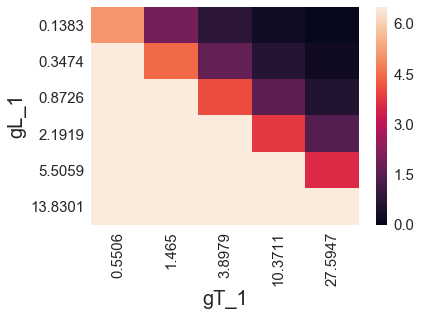

In [75]:
df_subset = df_grid.loc[(df_grid['gL_2'] == np.around(g_vals[1],decimals=4)) &\
                           (df_grid['Kd_2'] == np.around(Kd2_vals[1],decimals=4))&\
                           (df_grid['gT_2'] == np.around(gT_vals[1],decimals=4))]

# I HAD A ROUNDING ERROR ^ BUT FIXED W NP.AROUND

# I think dependence on aR == aL equivalence is only true for certain gR values. try gR = g_vals[3] vs [1]

# pandas pivot
heatmap_data = pd.pivot_table(df_subset, values='N_fold_change', 
                     index=['gL_1'], 
                     columns='gT_1')


sns.heatmap(heatmap_data, vmin = 0, vmax = 6.5)
df_subset.tail()        

REMEMBER: gT stands for ACTIVATION RATES NOT ENDOCYTOSIS

lower activation rate of Notch1-Dll1 complex --> less activated Notch1-Dll1 complex --> high fold diff

higher rates of endocytosis of Dll1 ligand --> less Dll1 complexes formed --> high fold diff  

,Kd_1,Kd_2,aR,gR,dR,gT_1,gT_2,aL_1,aL_2,gL_1,gL_2,gN,N_fold_change
1415,1,0.1,0.01,13.8301,0,10.3711,27.5947,0.01,0.01,5.5059,0.1383,0.5545,252.6069
1416,1,0.1,0.01,13.8301,0,10.3711,10.3711,0.01,0.01,5.5059,0.1383,0.5545,133.7171
1417,1,0.1,0.01,13.8301,0,10.3711,3.8979,0.01,0.01,5.5059,0.1383,0.5545,59.9529
1418,1,0.1,0.01,13.8301,0,10.3711,1.4650,0.01,0.01,5.5059,0.1383,0.5545,24.3508
1419,1,0.1,0.01,13.8301,0,10.3711,0.5506,0.01,0.01,5.5059,0.1383,0.5545,9.4420


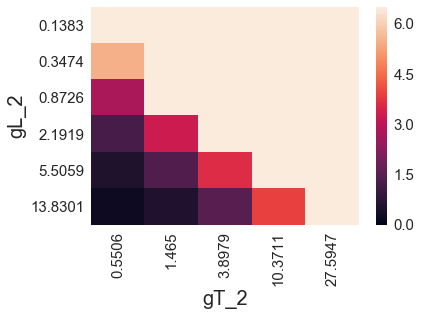

In [76]:
df_subset = df_grid.loc[(df_grid['gL_1'] == np.around(g_vals[1],decimals=4)) &\
                           (df_grid['Kd_2'] == np.around(Kd2_vals[1],decimals=4))&\
                           (df_grid['gT_1'] == np.around(gT_vals[1],decimals=4))]

# I HAD A ROUNDING ERROR ^ BUT FIXED W NP.AROUND

# I think dependence on aR == aL equivalence is only true for certain gR values. try gR = g_vals[3] vs [1]

# pandas pivot
heatmap_data = pd.pivot_table(df_subset, values='N_fold_change', 
                     index=['gL_2'], 
                     columns='gT_2')


sns.heatmap(heatmap_data, vmin = 0, vmax = 6.5)
df_subset.tail()        

exact opposite of last graph:

high activation rate of the Notch1-Dll4 complex --> high fold diff

low endocytosis of the Dll4 ligand --> more Dll4 to be stimulated/activated --> high fold diff


,Kd_1,Kd_2,aR,gR,dR,gT_1,gT_2,aL_1,aL_2,gL_1,gL_2,gN,N_fold_change
2015,1,0.1,0.01,13.8301,0,10.3711,27.5947,0.01,0.01,0.1383,5.5059,0.5545,0.7493
2016,1,0.1,0.01,13.8301,0,10.3711,10.3711,0.01,0.01,0.1383,5.5059,0.5545,0.2931
2017,1,0.1,0.01,13.8301,0,10.3711,3.8979,0.01,0.01,0.1383,5.5059,0.5545,0.1119
2018,1,0.1,0.01,13.8301,0,10.3711,1.4650,0.01,0.01,0.1383,5.5059,0.5545,0.0423
2019,1,0.1,0.01,13.8301,0,10.3711,0.5506,0.01,0.01,0.1383,5.5059,0.5545,0.0159


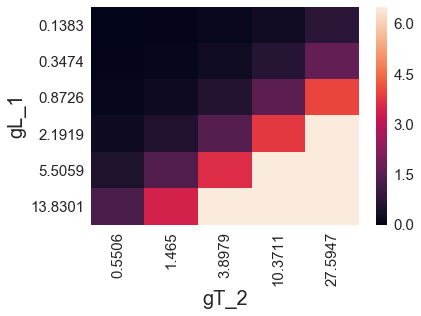

In [77]:
df_subset = df_grid.loc[(df_grid['gL_2'] == np.around(g_vals[1],decimals=4)) &\
                           (df_grid['Kd_2'] == np.around(Kd2_vals[1],decimals=4))&\
                           (df_grid['gT_1'] == np.around(gT_vals[1],decimals=4))]

# I HAD A ROUNDING ERROR ^ BUT FIXED W NP.AROUND

# I think dependence on aR == aL equivalence is only true for certain gR values. try gR = g_vals[3] vs [1]

# pandas pivot
heatmap_data = pd.pivot_table(df_subset, values='N_fold_change', 
                     index=['gL_1'], 
                     columns='gT_2')


sns.heatmap(heatmap_data, vmin = 0, vmax = 6.5)
df_subset.tail()        

increased activation of Notch1-Dll4 --> high fold diff

increased endocytosis of Dll1 --> high fold diff

1.0

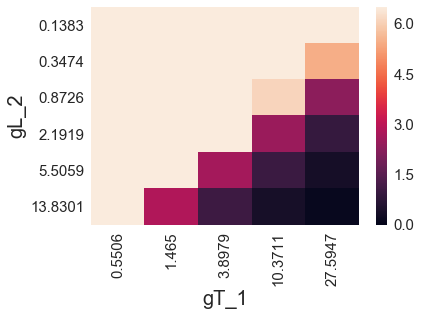

In [78]:
df_subset = df_grid.loc[(df_grid['gL_1'] == np.around(g_vals[1],decimals=4)) &\
                           (df_grid['Kd_2'] == np.around(Kd2_vals[3],decimals=4))&\
                           (df_grid['gT_2'] == np.around(gT_vals[1],decimals=4))]

# I HAD A ROUNDING ERROR ^ BUT FIXED W NP.AROUND

# I think dependence on aR == aL equivalence is only true for certain gR values. try gR = g_vals[3] vs [1]

# pandas pivot
heatmap_data = pd.pivot_table(df_subset, values='N_fold_change', 
                     index=['gL_2'], 
                     columns='gT_1')


sns.heatmap(heatmap_data, vmin = 0, vmax = 6.5)
df_subset.tail()        

Kd2_vals[3]

0.1

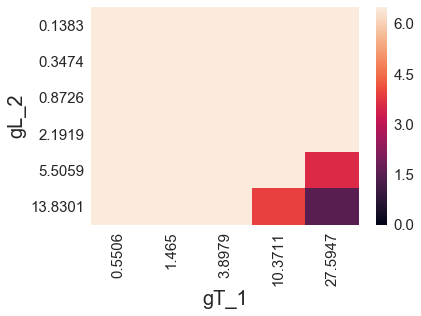

In [79]:
df_subset = df_grid.loc[(df_grid['gL_1'] == np.around(g_vals[1],decimals=4)) &\
                           (df_grid['Kd_2'] == np.around(Kd2_vals[1],decimals=4))&\
                           (df_grid['gT_2'] == np.around(gT_vals[1],decimals=4))]

# I HAD A ROUNDING ERROR ^ BUT FIXED W NP.AROUND

# I think dependence on aR == aL equivalence is only true for certain gR values. try gR = g_vals[3] vs [1]

# pandas pivot
heatmap_data = pd.pivot_table(df_subset, values='N_fold_change', 
                     index=['gL_2'], 
                     columns='gT_1')


sns.heatmap(heatmap_data, vmin = 0, vmax = 6.5)
df_subset.tail()        

Kd2_vals[1]

why is there such a clear distinction between high fold diff and low?

0.1

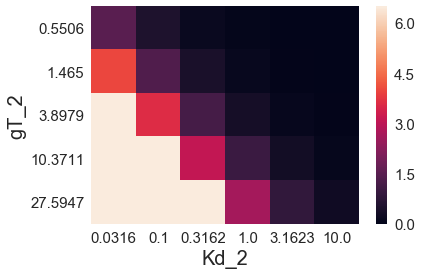

In [80]:
df_subset = df_grid.loc[(df_grid['gL_1'] == np.around(g_vals[1],decimals=4)) &\
                           (df_grid['gT_1'] == np.around(gT_vals[1],decimals=4))&\
                           (df_grid['gL_2'] == np.around(g_vals[1],decimals=4))]

# I HAD A ROUNDING ERROR ^ BUT FIXED W NP.AROUND

# I think dependence on aR == aL equivalence is only true for certain gR values. try gR = g_vals[3] vs [1]

# pandas pivot
heatmap_data = pd.pivot_table(df_subset, values='N_fold_change', 
                     index=['gT_2'], 
                     columns='Kd_2')


sns.heatmap(heatmap_data, vmin = 0, vmax = 6.5)
df_subset.tail()        

Kd2_vals[1]

In [81]:
# Pull out data where gL_1 < gL_2 (where Dll1 turnover is slower than Dll4)
slice_idx = np.where((df_L2_gt_L1['gL_1'] < df_L2_gt_L1['gL_2'])) 
df_sub = df_L2_gt_L1.iloc[slice_idx]
df_sub.head()

,Kd_1,Kd_2,aR,gR,dR,gT_1,gT_2,aL_1,aL_2,gL_1,gL_2,gN,N_fold_change
180,1,0.0316,0.01,13.8301,0,27.5947,27.5947,0.01,0.01,5.5059,13.8301,0.5545,11.2406
181,1,0.0316,0.01,13.8301,0,27.5947,10.3711,0.01,0.01,5.5059,13.8301,0.5545,4.4375
182,1,0.0316,0.01,13.8301,0,27.5947,3.8979,0.01,0.01,5.5059,13.8301,0.5545,1.7005
185,1,0.1000,0.01,13.8301,0,27.5947,27.5947,0.01,0.01,5.5059,13.8301,0.5545,3.8588
360,1,0.0316,0.01,13.8301,0,27.5947,27.5947,0.01,0.01,2.1919,13.8301,0.5545,4.5472


# dR 

In [1]:
np.log(2) / np.logspace(-1.3, .7, num=6, base=10.0)  

NameError: name 'np' is not defined

In [108]:
#%%time
# Fixed values ??? we non-dimensionalized to Kd_1. every concentration that is non-dimensionalized is a ratio to this Kd_1!
Kd_1 = 1
r_vals= np.log(2)/np.around(np.logspace(.7, 1.3, num=4, base=10.0),decimals=4) #np.logspace gives us hours and np.log(np.logspace) gives us units of per hours (hr^-1)
gN = np.log(2) / 1.25 # 1.25 h = 75 min #measured experimentally 

# Define variable param ranges; when playing around fix some of these param values to a single number!! 
'''
Kd2_vals = np.logspace(-1.5, 1., num=6, base=10.0) 
a_vals = np.logspace(-2, 2, num=6, base=10.0) # eventually expand to -3 to +3 #range of basal production for all cells ; same RANGE for all cells
g_vals = np.log(2) / np.logspace(-1.3, .7, num=6, base=10.0)  # half lives
gT_vals = np.log(2) / np.logspace(-1.6, 0.1, num=5, base=10.0)  #half lives
'''

gT_vals = np.around(np.log(2) / np.logspace(-1.6, 0.1, num=5, base=10.0),decimals=4)
Kd2_vals = np.around(np.logspace(-1.5, 1., num=6, base=10.0),decimals=4)
a_vals = np.around(np.logspace(-2, 2, num=6, base=10.0),decimals=4)
g_vals = np.log(2) / np.logspace(-1.3, .7, num=6, base=10.0)  
#gT_vals = np.log(2) / np.logspace(-1.6, 0.1, num=5, base=10.0) 
aL_1=.01
aL_2=aL_1
aR=0.01
gR=13.8301

# control production rates but not endocytosis bc those are diff 
#gR = 13.8301 # some value from g_vals to represent th rate of basal endocytosis of the single receptor R
#gL_1 = 13.8301 #some value from g_vals to represent the rate of basal endocytosis of the Dll1 ligand
#gL_2 = 13.8301 #some value from g_vals to represent the rate of basal endocytosis of the Dll4 ligand 

#range of values for the rate of endocytosis of stimulated ligand (i.e. ligand-receptor complex T) is different from
# the range of values for the surface endocytosis free ligand rate 
#gT_1 = 27.5947 #some value from gT_vals (gamma T represent rate of activation of T_1 complex)
#gT_2 = 27.5947 # some value from gT_vals (gamma T represent rate of activation of T_2 complex)

param_sets = []

#filling param set with all of the combos of all of the ranges of the parameters ^ ; interested in param sets that give large fold change between Notch1-Dll1 and Notch1-Dll4


for gT_1 in gT_vals:
    for gL_1 in g_vals:
        for gL_2 in g_vals:
            for Kd_2 in Kd2_vals:
                for gT_2 in gT_vals:
                    for dR in r_vals:#  WE WANT PRODUCTION RATE OF LIGANDS TO BE THE SAME FOR Dll1 and Dll4
                        param_sets.append((Kd_1, Kd_2, aR, gR, dR, 
                                            gT_1, gT_2, aL_1, aL_2, 
                                            gL_1, gL_2, gN))

                                

len(param_sets)

21600

In [109]:
%%time

# Run simulation

# Define time series parameters
duration = 50 # simulation duration in hr
interval = 5 # time step in minutes

# For us to say the system is at steady state,
# the change in variable values must be < 1 % 
# in final hour of simulation
convergence_crit = 1

results = []

for i, full_params in enumerate(param_sets):
    
    Kd_1, Kd_2, aR, gR, dR, gT_1, gT_2, aL_1, aL_2, gL_1, gL_2, gN = full_params

    params_1 = (Kd_1, aR, gR, dR, gT_1, aL_1, gL_1, gN) #notch 1 Dll1
    params_2 = (Kd_2, aR, gR, dR, gT_2, aL_2, gL_2, gN) #notch 1 Dll4
# why are computing two versions?? fold difference between what???? 2 different ligands with their own diff params. comparing the activation of each. fold difference of the steady state of N
    RLNT_1, RLNT_2, t, N_fold_change = \
            compare_param_sets(params_1, params_2, duration, interval, convergence_crit)
    
    results.append((*full_params, N_fold_change)) #what is this star ??? * UNPACKS ARRAY; otherwise it would be a list of an array and float.

# Store results in dataframe

df_grid = pd.DataFrame(results)
df_grid.columns = ['Kd_1', 'Kd_2', 'aR', 'gR', 'dR', 
                   'gT_1', 'gT_2', 'aL_1', 'aL_2', 
                   'gL_1', 'gL_2', 'gN', 'N_fold_change']
df_grid.head()

CPU times: user 2min 5s, sys: 2.38 s, total: 2min 7s
Wall time: 2min 41s


In [110]:
%%time 
# Save data in csv

filename = '/Users/catherineko/Desktop/FSRI/Research/2020-07-21_dR_output.csv'

df_grid.to_csv(filename, sep = ',', index=False)

CPU times: user 509 ms, sys: 50.9 ms, total: 560 ms
Wall time: 630 ms


In [111]:
# Read in data from stored file -- why did you have to reread in the file if we made it up there^^???

file = '/Users/catherineko/Desktop/FSRI/Research/2020-07-21_dR_output.csv'
df_grid = pd.read_csv(file)
df_grid.head()

# Round values in table for comparison

for col in df_grid.columns:
    df_grid[col] = np.around(df_grid[col], decimals = 4)
df_grid.head()

,Kd_1,Kd_2,aR,gR,dR,gT_1,gT_2,aL_1,aL_2,gL_1,gL_2,gN,N_fold_change
0,1,0.0316,0.01,13.8301,0.1383,27.5947,27.5947,0.01,0.01,13.8301,13.8301,0.5545,4.3577
1,1,0.0316,0.01,13.8301,0.0873,27.5947,27.5947,0.01,0.01,13.8301,13.8301,0.5545,5.9821
2,1,0.0316,0.01,13.8301,0.0551,27.5947,27.5947,0.01,0.01,13.8301,13.8301,0.5545,8.1452
3,1,0.0316,0.01,13.8301,0.0347,27.5947,27.5947,0.01,0.01,13.8301,13.8301,0.5545,10.8218
4,1,0.0316,0.01,13.8301,0.1383,27.5947,10.3711,0.01,0.01,13.8301,13.8301,0.5545,2.2384


In [112]:
# Check that there are no negative values

df_grid.loc[df_grid['N_fold_change']<0]

,Kd_1,Kd_2,aR,gR,dR,gT_1,gT_2,aL_1,aL_2,gL_1,gL_2,gN,N_fold_change


### Examine parameter sets for which N fold change > 1.5

In [113]:
df_L2_gt_L1 = df_grid.loc[df_grid['N_fold_change']>1.5]
df_L2_gt_L1.head()

,Kd_1,Kd_2,aR,gR,dR,gT_1,gT_2,aL_1,aL_2,gL_1,gL_2,gN,N_fold_change
0,1,0.0316,0.01,13.8301,0.1383,27.5947,27.5947,0.01,0.01,13.8301,13.8301,0.5545,4.3577
1,1,0.0316,0.01,13.8301,0.0873,27.5947,27.5947,0.01,0.01,13.8301,13.8301,0.5545,5.9821
2,1,0.0316,0.01,13.8301,0.0551,27.5947,27.5947,0.01,0.01,13.8301,13.8301,0.5545,8.1452
3,1,0.0316,0.01,13.8301,0.0347,27.5947,27.5947,0.01,0.01,13.8301,13.8301,0.5545,10.8218
4,1,0.0316,0.01,13.8301,0.1383,27.5947,10.3711,0.01,0.01,13.8301,13.8301,0.5545,2.2384


,Kd_1,Kd_2,aR,gR,dR,gT_1,gT_2,aL_1,aL_2,gL_1,gL_2,gN,N_fold_change
13827,1,0.1,0.01,13.8301,0.0347,1.4650,10.3711,0.01,0.01,5.5059,5.5059,0.5545,5.6536
18144,1,0.1,0.01,13.8301,0.1383,0.5506,10.3711,0.01,0.01,5.5059,5.5059,0.5545,2.2409
18145,1,0.1,0.01,13.8301,0.0873,0.5506,10.3711,0.01,0.01,5.5059,5.5059,0.5545,2.9740
18146,1,0.1,0.01,13.8301,0.0551,0.5506,10.3711,0.01,0.01,5.5059,5.5059,0.5545,4.1236
18147,1,0.1,0.01,13.8301,0.0347,0.5506,10.3711,0.01,0.01,5.5059,5.5059,0.5545,5.9151


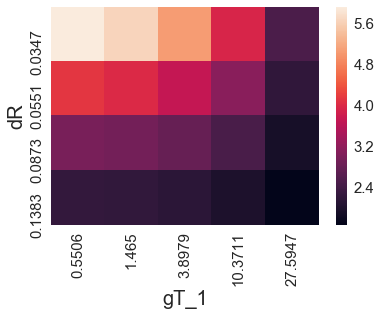

In [114]:
df_subset = df_grid.loc[(df_grid['gL_2'] == np.around(g_vals[1],decimals=4)) &\
                           (df_grid['gL_1'] == np.around(g_vals[1],decimals=4)) &\
                           (df_grid['Kd_2'] == np.around(Kd2_vals[1],decimals=4))&\
                           (df_grid['gT_2'] == np.around(gT_vals[1],decimals=4))]

# I HAD A ROUNDING ERROR ^ BUT FIXED W NP.AROUND

# I think dependence on aR == aL equivalence is only true for certain gR values. try gR = g_vals[3] vs [1]

# pandas pivot
heatmap_data = pd.pivot_table(df_subset, values='N_fold_change', 
                     index=['dR'], 
                     columns='gT_1')


sns.heatmap(heatmap_data)
df_subset.tail()        

,Kd_1,Kd_2,aR,gR,dR,gT_1,gT_2,aL_1,aL_2,gL_1,gL_2,gN,N_fold_change
5195,1,0.1,0.01,13.8301,0.0347,10.3711,1.4650,0.01,0.01,5.5059,5.5059,0.5545,1.1184
5196,1,0.1,0.01,13.8301,0.1383,10.3711,0.5506,0.01,0.01,5.5059,5.5059,0.5545,0.9289
5197,1,0.1,0.01,13.8301,0.0873,10.3711,0.5506,0.01,0.01,5.5059,5.5059,0.5545,0.9018
5198,1,0.1,0.01,13.8301,0.0551,10.3711,0.5506,0.01,0.01,5.5059,5.5059,0.5545,0.8655
5199,1,0.1,0.01,13.8301,0.0347,10.3711,0.5506,0.01,0.01,5.5059,5.5059,0.5545,0.8201


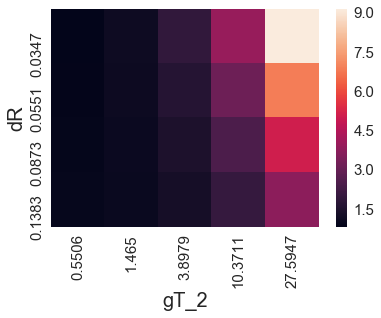

In [115]:
df_subset = df_grid.loc[(df_grid['gL_2'] == np.around(g_vals[1],decimals=4)) &\
                           (df_grid['gL_1'] == np.around(g_vals[1],decimals=4)) &\
                           (df_grid['Kd_2'] == np.around(Kd2_vals[1],decimals=4))&\
                           (df_grid['gT_1'] == np.around(gT_vals[1],decimals=4))]

# I HAD A ROUNDING ERROR ^ BUT FIXED W NP.AROUND

# I think dependence on aR == aL equivalence is only true for certain gR values. try gR = g_vals[3] vs [1]

# pandas pivot
heatmap_data = pd.pivot_table(df_subset, values='N_fold_change', 
                     index=['dR'], 
                     columns='gT_2')


sns.heatmap(heatmap_data)
df_subset.tail()        

looks like lower rates of leaky activation of the receptor --> higher fold diff

,Kd_1,Kd_2,aR,gR,dR,gT_1,gT_2,aL_1,aL_2,gL_1,gL_2,gN,N_fold_change
5547,1,0.1,0.01,13.8301,0.0347,10.3711,10.3711,0.01,0.01,5.5059,0.3474,0.5545,30.4031
5664,1,0.1,0.01,13.8301,0.1383,10.3711,10.3711,0.01,0.01,5.5059,0.1383,0.5545,16.5903
5665,1,0.1,0.01,13.8301,0.0873,10.3711,10.3711,0.01,0.01,5.5059,0.1383,0.5545,24.2439
5666,1,0.1,0.01,13.8301,0.0551,10.3711,10.3711,0.01,0.01,5.5059,0.1383,0.5545,34.5176
5667,1,0.1,0.01,13.8301,0.0347,10.3711,10.3711,0.01,0.01,5.5059,0.1383,0.5545,47.3622


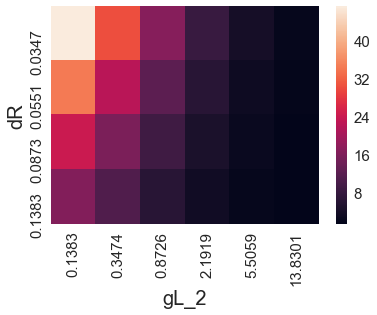

In [116]:
df_subset = df_grid.loc[(df_grid['gT_2'] == np.around(gT_vals[1],decimals=4)) &\
                           (df_grid['gL_1'] == np.around(g_vals[1],decimals=4)) &\
                           (df_grid['Kd_2'] == np.around(Kd2_vals[1],decimals=4))&\
                           (df_grid['gT_1'] == np.around(gT_vals[1],decimals=4))]

# I HAD A ROUNDING ERROR ^ BUT FIXED W NP.AROUND

# I think dependence on aR == aL equivalence is only true for certain gR values. try gR = g_vals[3] vs [1]

# pandas pivot
heatmap_data = pd.pivot_table(df_subset, values='N_fold_change', 
                     index=['dR'], 
                     columns='gL_2')


sns.heatmap(heatmap_data)
df_subset.tail()        

,Kd_1,Kd_2,aR,gR,dR,gT_1,gT_2,aL_1,aL_2,gL_1,gL_2,gN,N_fold_change
7347,1,0.1,0.01,13.8301,0.0347,10.3711,10.3711,0.01,0.01,0.3474,5.5059,0.5545,0.6918
8064,1,0.1,0.01,13.8301,0.1383,10.3711,10.3711,0.01,0.01,0.1383,5.5059,0.5545,0.4267
8065,1,0.1,0.01,13.8301,0.0873,10.3711,10.3711,0.01,0.01,0.1383,5.5059,0.5545,0.3831
8066,1,0.1,0.01,13.8301,0.0551,10.3711,10.3711,0.01,0.01,0.1383,5.5059,0.5545,0.3525
8067,1,0.1,0.01,13.8301,0.0347,10.3711,10.3711,0.01,0.01,0.1383,5.5059,0.5545,0.3316


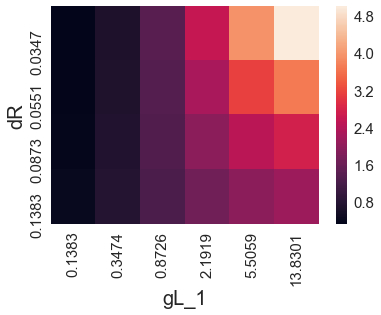

In [117]:
df_subset = df_grid.loc[(df_grid['gT_2'] == np.around(gT_vals[1],decimals=4)) &\
                           (df_grid['gL_2'] == np.around(g_vals[1],decimals=4)) &\
                           (df_grid['Kd_2'] == np.around(Kd2_vals[1],decimals=4))&\
                           (df_grid['gT_1'] == np.around(gT_vals[1],decimals=4))]

# I HAD A ROUNDING ERROR ^ BUT FIXED W NP.AROUND

# I think dependence on aR == aL equivalence is only true for certain gR values. try gR = g_vals[3] vs [1]

# pandas pivot
heatmap_data = pd.pivot_table(df_subset, values='N_fold_change', 
                     index=['dR'], 
                     columns='gL_1')


sns.heatmap(heatmap_data)
df_subset.tail()        

low leaky activation and low Dll1 endocytosis --> super low fold diff (lots of activated Dll1 and low Dll4)


In [118]:
Kd2_vals

array([ 0.0316,  0.1   ,  0.3162,  1.    ,  3.1623, 10.    ])

0.0316


,Kd_1,Kd_2,aR,gR,dR,gT_1,gT_2,aL_1,aL_2,gL_1,gL_2,gN,N_fold_change
7327,1,0.0316,0.01,13.8301,0.0347,10.3711,10.3711,0.01,0.01,0.3474,5.5059,0.5545,1.7437
8044,1,0.0316,0.01,13.8301,0.1383,10.3711,10.3711,0.01,0.01,0.1383,5.5059,0.5545,0.8592
8045,1,0.0316,0.01,13.8301,0.0873,10.3711,10.3711,0.01,0.01,0.1383,5.5059,0.5545,0.8485
8046,1,0.0316,0.01,13.8301,0.0551,10.3711,10.3711,0.01,0.01,0.1383,5.5059,0.5545,0.8410
8047,1,0.0316,0.01,13.8301,0.0347,10.3711,10.3711,0.01,0.01,0.1383,5.5059,0.5545,0.8359


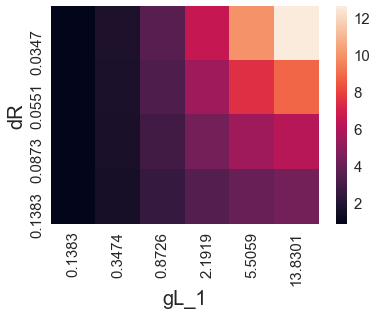

In [119]:
df_subset = df_grid.loc[(df_grid['gT_2'] == np.around(gT_vals[1],decimals=4)) &\
                           (df_grid['gL_2'] == np.around(g_vals[1],decimals=4)) &\
                           (df_grid['Kd_2'] == np.around(Kd2_vals[0],decimals=4))&\
                           (df_grid['gT_1'] == np.around(gT_vals[1],decimals=4))]
print(Kd2_vals[0])
# I HAD A ROUNDING ERROR ^ BUT FIXED W NP.AROUND

# I think dependence on aR == aL equivalence is only true for certain gR values. try gR = g_vals[3] vs [1]

# pandas pivot
heatmap_data = pd.pivot_table(df_subset, values='N_fold_change', 
                     index=['dR'], 
                     columns='gL_1')


sns.heatmap(heatmap_data)
df_subset.tail()        

10.0


,Kd_1,Kd_2,aR,gR,dR,gT_1,gT_2,aL_1,aL_2,gL_1,gL_2,gN,N_fold_change
7427,1,10.0,0.01,13.8301,0.0347,10.3711,10.3711,0.01,0.01,0.3474,5.5059,0.5545,0.1200
8144,1,10.0,0.01,13.8301,0.1383,10.3711,10.3711,0.01,0.01,0.1383,5.5059,0.5545,0.1919
8145,1,10.0,0.01,13.8301,0.0873,10.3711,10.3711,0.01,0.01,0.1383,5.5059,0.5545,0.1303
8146,1,10.0,0.01,13.8301,0.0551,10.3711,10.3711,0.01,0.01,0.1383,5.5059,0.5545,0.0870
8147,1,10.0,0.01,13.8301,0.0347,10.3711,10.3711,0.01,0.01,0.1383,5.5059,0.5545,0.0575


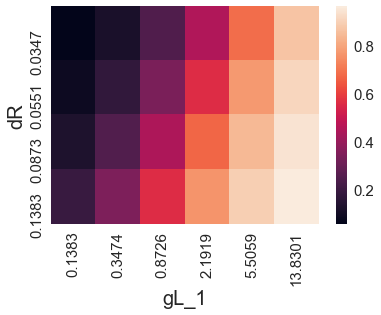

In [121]:
df_subset = df_grid.loc[(df_grid['gT_2'] == np.around(gT_vals[1],decimals=4)) &\
                           (df_grid['gL_2'] == np.around(g_vals[1],decimals=4)) &\
                           (df_grid['Kd_2'] == np.around(Kd2_vals[5],decimals=4))&\
                           (df_grid['gT_1'] == np.around(gT_vals[1],decimals=4))]
print(Kd2_vals[5])
# I HAD A ROUNDING ERROR ^ BUT FIXED W NP.AROUND

# I think dependence on aR == aL equivalence is only true for certain gR values. try gR = g_vals[3] vs [1]

# pandas pivot
heatmap_data = pd.pivot_table(df_subset, values='N_fold_change', 
                     index=['dR'], 
                     columns='gL_1')


sns.heatmap(heatmap_data)
df_subset.tail()        

the N_2 is so small that adding stuff to both numerator and denom increase the N_fold_change

,Kd_1,Kd_2,aR,gR,dR,gT_1,gT_2,aL_1,aL_2,gL_1,gL_2,gN,N_fold_change
5247,1,3.1623,0.01,13.8301,0.0347,10.3711,10.3711,0.01,0.01,5.5059,5.5059,0.5545,0.7620
5264,1,10.0000,0.01,13.8301,0.1383,10.3711,10.3711,0.01,0.01,5.5059,5.5059,0.5545,0.8950
5265,1,10.0000,0.01,13.8301,0.0873,10.3711,10.3711,0.01,0.01,5.5059,5.5059,0.5545,0.8431
5266,1,10.0000,0.01,13.8301,0.0551,10.3711,10.3711,0.01,0.01,5.5059,5.5059,0.5545,0.7734
5267,1,10.0000,0.01,13.8301,0.0347,10.3711,10.3711,0.01,0.01,5.5059,5.5059,0.5545,0.6863


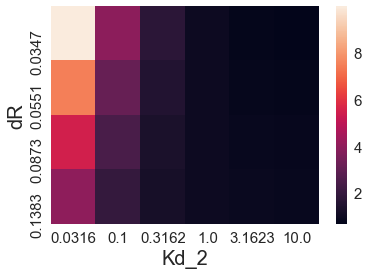

In [122]:
df_subset = df_grid.loc[(df_grid['gT_2'] == np.around(gT_vals[1],decimals=4)) &\
                           (df_grid['gL_1'] == np.around(g_vals[1],decimals=4)) &\
                           (df_grid['gL_2'] == np.around(g_vals[1],decimals=4))&\
                           (df_grid['gT_1'] == np.around(gT_vals[1],decimals=4))]

# I HAD A ROUNDING ERROR ^ BUT FIXED W NP.AROUND

# I think dependence on aR == aL equivalence is only true for certain gR values. try gR = g_vals[3] vs [1]

# pandas pivot
heatmap_data = pd.pivot_table(df_subset, values='N_fold_change', 
                     index=['dR'], 
                     columns='Kd_2')


sns.heatmap(heatmap_data)
df_subset.tail()        

# dR, aR, aL, Kd

In [164]:

# Fixed values ??? we non-dimensionalized to Kd_1. every concentration that is non-dimensionalized is a ratio to this Kd_1!
Kd_1 = 1
r_vals= np.append(np.log(2)/np.around(np.logspace(.7, 1.3, num=4, base=10.0),decimals=4),0)

gN = np.log(2) / 1.25 # 1.25 h = 75 min #measured experimentally 

# Define variable param ranges; when playing around fix some of these param values to a single number!! 
'''
Kd2_vals = np.logspace(-1.5, 1., num=6, base=10.0) 
a_vals = np.logspace(-2, 2, num=6, base=10.0) # eventually expand to -3 to +3 #range of basal production for all cells ; same RANGE for all cells
g_vals = np.log(2) / np.logspace(-1.3, .7, num=6, base=10.0)  
gT_vals = np.log(2) / np.logspace(-1.6, 0.1, num=5, base=10.0) 
'''


Kd2_vals = np.around(np.logspace(-1.5, 1., num=6, base=10.0),decimals=4)
a_vals = np.around(np.logspace(-2, 2, num=6, base=10.0),decimals=4)


# control production rates but not endocytosis bc those are diff 
gR = 13.8301 # some value from g_vals to represent th rate of basal endocytosis of the single receptor R
gL_1 = 13.8301 #some value from g_vals to represent the rate of basal endocytosis of the Dll1 ligand
gL_2 = 13.8301 #some value from g_vals to represent the rate of basal endocytosis of the Dll4 ligand 

#range of values for the rate of endocytosis of stimulated ligand (i.e. ligand-receptor complex T) is different from
# the range of values for the surface endocytosis free ligand rate 
gT_1 = 27.5947 #some value from gT_vals (gamma T represent rate of activation of T_1 complex)
gT_2 = 27.5947 # some value from gT_vals (gamma T represent rate of activation of T_2 complex)

param_sets = []

#filling param set with all of the combos of all of the ranges of the parameters ^ ; interested in param sets that give large fold change between Notch1-Dll1 and Notch1-Dll4


for Kd_2 in Kd2_vals:
    for aR in a_vals:
        for dR in r_vals:
            for aL_1 in a_vals:
                aL_2 = aL_1 #  WE WANT PRODUCTION RATE OF LIGANDS TO BE THE SAME FOR Dll1 and Dll4
                param_sets.append((Kd_1, Kd_2, aR, gR, dR, 
                                   gT_1, gT_2, aL_1, aL_2, 
                                   gL_1, gL_2, gN))

                                

len(param_sets)

1080

In [165]:
# Run simulation

# Define time series parameters
duration = 50 # simulation duration in hr
interval = 5 # time step in minutes

# For us to say the system is at steady state,
# the change in variable values must be < 1 % 
# in final hour of simulation
convergence_crit = 1

results = []


In [166]:
%%time

# Run simulation

# Define time series parameters
duration = 50 # simulation duration in hr
interval = 5 # time step in minutes

# For us to say the system is at steady state,
# the change in variable values must be < 1 % 
# in final hour of simulation
convergence_crit = 1

results = []

for i, full_params in enumerate(param_sets):
    
    Kd_1, Kd_2, aR, gR, dR, gT_1, gT_2, aL_1, aL_2, gL_1, gL_2, gN = full_params

    params_1 = (Kd_1, aR, gR, dR, gT_1, aL_1, gL_1, gN) #notch 1 Dll1
    params_2 = (Kd_2, aR, gR, dR, gT_2, aL_2, gL_2, gN) #notch 1 Dll4
# why are computing two versions?? fold difference between what???? 2 different ligands with their own diff params. comparing the activation of each. fold difference of the steady state of N
    RLNT_1, RLNT_2, t, N_fold_change = \
            compare_param_sets(params_1, params_2, duration, interval, convergence_crit)
    
    results.append((*full_params, N_fold_change)) #what is this star ??? * UNPACKS ARRAY; otherwise it would be a list of an array and float.







CPU times: user 12.8 s, sys: 121 ms, total: 12.9 s
Wall time: 13.4 s


In [167]:
%%time 
# Store results in dataframe

df_grid = pd.DataFrame(results)
df_grid.columns = ['Kd_1', 'Kd_2', 'aR', 'gR', 'dR', 
                   'gT_1', 'gT_2', 'aL_1', 'aL_2', 
                   'gL_1', 'gL_2', 'gN', 'N_fold_change']
df_grid.head()

CPU times: user 6.18 ms, sys: 1.09 ms, total: 7.26 ms
Wall time: 14.1 ms


In [168]:
%%time 
# Save data in csv

filename = '/Users/catherineko/Desktop/FSRI/Research/2020-07-22_dRa_output.csv'

df_grid.to_csv(filename, sep = ',', index=False)

CPU times: user 36.6 ms, sys: 6.29 ms, total: 42.9 ms
Wall time: 57.9 ms


### Read in data

In [169]:
# Read in data from stored file -- why did you have to reread in the file if we made it up there^^???

file = '/Users/catherineko/Desktop/FSRI/Research/2020-07-22_dRa_output.csv'
df_grid = pd.read_csv(file)
df_grid.head()

,Kd_1,Kd_2,aR,gR,dR,gT_1,gT_2,aL_1,aL_2,gL_1,gL_2,gN,N_fold_change
0,1,0.0316,0.01,13.8301,0.1383,27.5947,27.5947,0.0100,0.0100,13.8301,13.8301,0.554518,4.357732
1,1,0.0316,0.01,13.8301,0.1383,27.5947,27.5947,0.0631,0.0631,13.8301,13.8301,0.554518,10.739829
2,1,0.0316,0.01,13.8301,0.1383,27.5947,27.5947,0.3981,0.3981,13.8301,13.8301,0.554518,7.919991
3,1,0.0316,0.01,13.8301,0.1383,27.5947,27.5947,2.5119,2.5119,13.8301,13.8301,0.554518,2.629835
4,1,0.0316,0.01,13.8301,0.1383,27.5947,27.5947,15.8489,15.8489,13.8301,13.8301,0.554518,1.277048


In [170]:
# Round values in table for comparison

for col in df_grid.columns:
    df_grid[col] = np.around(df_grid[col], decimals = 4)
df_grid.head()

,Kd_1,Kd_2,aR,gR,dR,gT_1,gT_2,aL_1,aL_2,gL_1,gL_2,gN,N_fold_change
0,1,0.0316,0.01,13.8301,0.1383,27.5947,27.5947,0.0100,0.0100,13.8301,13.8301,0.5545,4.3577
1,1,0.0316,0.01,13.8301,0.1383,27.5947,27.5947,0.0631,0.0631,13.8301,13.8301,0.5545,10.7398
2,1,0.0316,0.01,13.8301,0.1383,27.5947,27.5947,0.3981,0.3981,13.8301,13.8301,0.5545,7.9200
3,1,0.0316,0.01,13.8301,0.1383,27.5947,27.5947,2.5119,2.5119,13.8301,13.8301,0.5545,2.6298
4,1,0.0316,0.01,13.8301,0.1383,27.5947,27.5947,15.8489,15.8489,13.8301,13.8301,0.5545,1.2770


In [171]:
# Check that there are no negative values

df_grid.loc[df_grid['N_fold_change']<0]

,Kd_1,Kd_2,aR,gR,dR,gT_1,gT_2,aL_1,aL_2,gL_1,gL_2,gN,N_fold_change


### Examine parameter sets for which N fold change > 1.5

In [172]:
df_L2_gt_L1 = df_grid.loc[df_grid['N_fold_change']>1.5]
df_L2_gt_L1.tail()

,Kd_1,Kd_2,aR,gR,dR,gT_1,gT_2,aL_1,aL_2,gL_1,gL_2,gN,N_fold_change
471,1,0.3162,2.5119,13.8301,0.0347,27.5947,27.5947,2.5119,2.5119,13.8301,13.8301,0.5545,1.6803
474,1,0.3162,2.5119,13.8301,0.0000,27.5947,27.5947,0.0100,0.0100,13.8301,13.8301,0.5545,1.7949
475,1,0.3162,2.5119,13.8301,0.0000,27.5947,27.5947,0.0631,0.0631,13.8301,13.8301,0.5545,1.7947
476,1,0.3162,2.5119,13.8301,0.0000,27.5947,27.5947,0.3981,0.3981,13.8301,13.8301,0.5545,1.7908
477,1,0.3162,2.5119,13.8301,0.0000,27.5947,27.5947,2.5119,2.5119,13.8301,13.8301,0.5545,1.6886


Text(0.5,1,'dR=0.0')

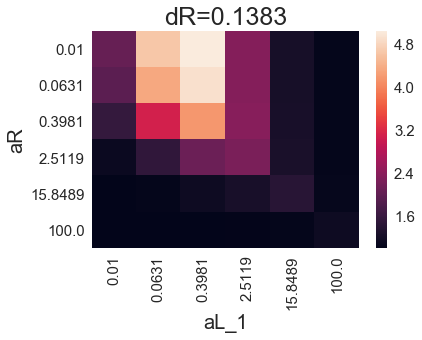

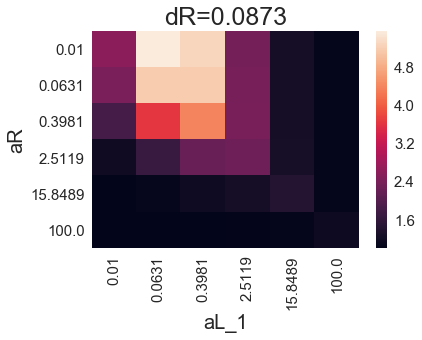

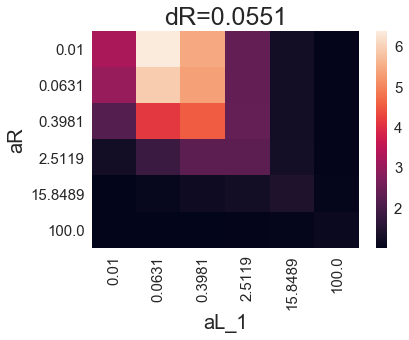

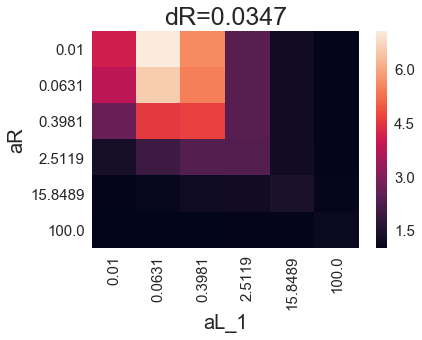

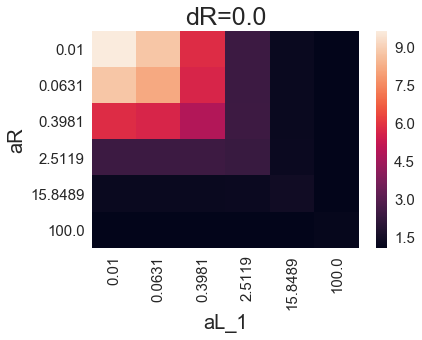

In [181]:
df_subset = df_grid.loc[(df_grid['Kd_2'] == np.around(Kd2_vals[1],decimals=4)) &\
                           (df_grid['dR'] == np.around(r_vals[0],decimals=4))]

# I HAD A ROUNDING ERROR ^ BUT FIXED W NP.AROUND

# I think dependence on aR == aL equivalence is only true for certain gR values. try gR = g_vals[3] vs [1]

# pandas pivot
heatmap_data = pd.pivot_table(df_subset, values='N_fold_change', 
                     index=['aR'], 
                     columns='aL_1')


sns.heatmap(heatmap_data)
ax=plt.gca()
ax.set_title('dR='+str(df_subset.iloc[0,4]))   

plt.figure()

df_subset = df_grid.loc[(df_grid['Kd_2'] == np.around(Kd2_vals[1],decimals=4)) &\
                           (df_grid['dR'] == np.around(r_vals[1],decimals=4))]

# I HAD A ROUNDING ERROR ^ BUT FIXED W NP.AROUND

# I think dependence on aR == aL equivalence is only true for certain gR values. try gR = g_vals[3] vs [1]

# pandas pivot
heatmap_data = pd.pivot_table(df_subset, values='N_fold_change', 
                     index=['aR'], 
                     columns='aL_1')


sns.heatmap(heatmap_data)
ax=plt.gca()
ax.set_title('dR='+str(df_subset.iloc[0,4]))   

plt.figure()

df_subset = df_grid.loc[(df_grid['Kd_2'] == np.around(Kd2_vals[1],decimals=4)) &\
                           (df_grid['dR'] == np.around(r_vals[2],decimals=4))]

# I HAD A ROUNDING ERROR ^ BUT FIXED W NP.AROUND

# I think dependence on aR == aL equivalence is only true for certain gR values. try gR = g_vals[3] vs [1]

# pandas pivot
heatmap_data = pd.pivot_table(df_subset, values='N_fold_change', 
                     index=['aR'], 
                     columns='aL_1')


sns.heatmap(heatmap_data)
ax=plt.gca()
ax.set_title('dR='+str(df_subset.iloc[0,4]))   

plt.figure()

df_subset = df_grid.loc[(df_grid['Kd_2'] == np.around(Kd2_vals[1],decimals=4)) &\
                           (df_grid['dR'] == np.around(r_vals[3],decimals=4))]

# I HAD A ROUNDING ERROR ^ BUT FIXED W NP.AROUND

# I think dependence on aR == aL equivalence is only true for certain gR values. try gR = g_vals[3] vs [1]

# pandas pivot
heatmap_data = pd.pivot_table(df_subset, values='N_fold_change', 
                     index=['aR'], 
                     columns='aL_1')


sns.heatmap(heatmap_data)
ax=plt.gca()
ax.set_title('dR='+str(df_subset.iloc[0,4]))   

plt.figure()

df_subset = df_grid.loc[(df_grid['Kd_2'] == np.around(Kd2_vals[1],decimals=4)) &\
                           (df_grid['dR'] == np.around(r_vals[4],decimals=4))]

# I HAD A ROUNDING ERROR ^ BUT FIXED W NP.AROUND

# I think dependence on aR == aL equivalence is only true for certain gR values. try gR = g_vals[3] vs [1]

# pandas pivot
heatmap_data = pd.pivot_table(df_subset, values='N_fold_change', 
                     index=['aR'], 
                     columns='aL_1')


sns.heatmap(heatmap_data)
ax=plt.gca()
ax.set_title('dR='+str(df_subset.iloc[0,4]))   

In [1]:
from IPython.display import Video

Video("dRchanging.mov",embed=True)

In [ ]:
pd.Series.unique(df_sub['gR'])

In [ ]:
g_vals[4]

In [ ]:
# Pull out data subset

df_subset = df_L2_gt_L1.loc[(df_L2_gt_L1['gT_1'] == gT_vals[3]) &\
                           (df_L2_gt_L1['gT_2'] == gT_vals[1]) &\
                           (df_L2_gt_L1['aL_1'] == a_vals[2]) &\
                           (df_L2_gt_L1['gL_1'] == g_vals[4]) &\
                            (df_L2_gt_L1['gL_2'] == g_vals[2]) &\
                           (df_L2_gt_L1['gR'] == g_vals[3])]

df_subset.head()

In [ ]:
df_subset = df_L2_gt_L1.loc[(df_L2_gt_L1['gL_2'] == g_vals[2]) &\
                           (df_L2_gt_L1['gT_1'] == gT_vals[3]) &\
                           (df_L2_gt_L1['gT_2'] == gT_vals[1]) &\
                           (df_L2_gt_L1['aL_1'] == a_vals[2]) &\
                           (df_L2_gt_L1['gL_1'] == g_vals[4]) &\
                           (df_L2_gt_L1['gR'] == g_vals[3])]

# df_subset['gR'] = np.log(2) / df_subset['gR']

# pandas pivot
heatmap_data = pd.pivot_table(df_subset, values='N_fold_change', 
                     index=['aR'], 
                     columns='Kd_2')


sns.heatmap(heatmap_data)

In [ ]:
df_subset = df_grid.loc[(df_grid['gL_2'] == g_vals[2]) &\
                           (df_grid['gT_1'] == gT_vals[3]) &\
                           (df_grid['gT_2'] == gT_vals[1]) &\
                           (df_grid['aL_1'] == a_vals[2]) &\
                           (df_grid['gL_1'] == g_vals[4]) &\
                           (df_grid['gR'] == g_vals[3])]


# pandas pivot
heatmap_data = pd.pivot_table(df_subset, values='N_fold_change', 
                     index=['aR'], 
                     columns='Kd_2')


sns.heatmap(heatmap_data)

In [ ]:
heatmap_data

In [ ]:
df_subset = df_grid.loc[(df_grid['gL_2'] == g_vals[2]) &\
                           (df_grid['gT_1'] == gT_vals[3]) &\
                           (df_grid['gT_2'] == gT_vals[1]) &\
                           (df_grid['aL_1'] == a_vals[2]) &\
                           (df_grid['gL_1'] == g_vals[4]) &\
                           (df_grid['Kd_2'] == Kd2_vals[1])]

# df_subset['gR'] = np.log(2) / df_subset['gR']

# pandas pivot
heatmap_data = pd.pivot_table(df_subset, values='N_fold_change', 
                     index=['aR'], 
                     columns='gR')


sns.heatmap(heatmap_data)

In [ ]:
heatmap_data

In [ ]:
df_subset = df_L2_gt_L1.loc[(df_L2_gt_L1['gL_2'] == g_vals[2]) &\
                           (df_L2_gt_L1['gT_1'] == gT_vals[2]) &\
                           (df_L2_gt_L1['gT_2'] == gT_vals[1]) &\
                           (df_L2_gt_L1['aL_1'] == a_vals[2]) &\
                           (df_L2_gt_L1['gL_1'] == g_vals[4]) &\
                           (df_L2_gt_L1['gR'] == g_vals[2])]

# df_subset['gR'] = np.log(2) / df_subset['gR']

# pandas pivot
heatmap_data = pd.pivot_table(df_subset, values='N_fold_change', 
                     index=['aR'], 
                     columns='Kd_2')


sns.heatmap(heatmap_data)

In [ ]:
# Define variable param ranges
Kd2_vals = np.logspace(-1.5, 1., num=6, base=10.0) 
a_vals = np.logspace(-2, 2, num=6, base=10.0) # eventually expand to -3 to +3
g_vals = np.log(2) / np.logspace(-1.3, .7, num=6, base=10.0) 
gT_vals = np.log(2) / np.logspace(-1.6, 0.1, num=5, base=10.0)

In [ ]:
g_vals[3]

In [ ]:
# Ligand 1
np.log(2) / gT_vals[2]

In [ ]:
# Ligand 2
np.log(2) / g_vals[4]

#### Fixed parameters
- $\alpha_{L} = 0.4$ (for L1 and L2)
- $\gamma_{L1} = \frac{\log(2)}{2h}$
- $\gamma_{L2} = \frac{\log(2)}{0.3h}$
- $\gamma_{T(1,1)} = \frac{\log(2)}{0.5h}$
- $\gamma_{T(1,2)} = \frac{\log(2)}{0.07h}$
- $\gamma_{R} = \frac{\log(2)}{0.8h}$
- $K_{d1} = 1$


In [ ]:
df_subset = df_L2_gt_L1.loc[(df_L2_gt_L1['gL_2'] == g_vals[4]) &\
                           (df_L2_gt_L1['gT_1'] == gT_vals[3]) &\
                           (df_L2_gt_L1['aR'] == a_vals[3]) &\
                           (df_L2_gt_L1['aL_1'] == a_vals[3]) &\
                           (df_L2_gt_L1['gL_1'] == g_vals[2]) &\
                           (df_L2_gt_L1['Kd_2'] == Kd2_vals[1])]

# df_subset['gR'] = np.log(2) / df_subset['gR']

# pandas pivot
heatmap_data = pd.pivot_table(df_subset, values='N_fold_change', 
                     index=['gT_2'], 
                     columns='gR')


sns.heatmap(heatmap_data)

In [ ]:
df_subset = df_L2_gt_L1.loc[(df_L2_gt_L1['Kd_2'] == Kd2_vals[1]) &\
                           (df_L2_gt_L1['gT_1'] == gT_vals[3]) &\
                           (df_L2_gt_L1['gT_2'] == gT_vals[1]) &\
                           (df_L2_gt_L1['aR'] == a_vals[3]) &\
                           (df_L2_gt_L1['gL_1'] == g_vals[4]) &\
                           (df_L2_gt_L1['gL_2'] == g_vals[2])]

df_subset['gR'] = np.log(2) / df_subset['gR']

# pandas pivot
heatmap_data = pd.pivot_table(df_subset, values='N_fold_change', 
                     index=['aL_1'], 
                     columns='gR')


sns.heatmap(heatmap_data)

## What we have learned

1. Production rates ($\alpha$)
    - NICD fold difference is highest when $\alpha_R$ is similar to $\alpha_L$, and when both values are small. 
    - It is more important that the values are similar than that they are small.
    
    
2. Activation rates ($\gamma_T$)
    - NICD fold difference is highest when the $\gamma_T$ values are very different. The ligand with higher $\gamma_T$ will produce a much higher NICD level.
    
    
3. Basal ligand endocytosis rates ($\gamma_L$)
    - NICD fold difference is highest when the $\gamma_L$ values are very different. The ligand with higher $\gamma_L$ will produce a much lower NICD level, because its surface levels are very low.
    
    
4. Basal receptor endocytosis rate ($\gamma_R$)
    - NICD fold difference is highest when the $\gamma_R$ value is large (available receptor levels are low).
    
    
5. Equilibrium dissociation constant ($K_{d}$) 
    - NICD fold difference is highest when $K_{d2}$ is very small relative to $K_{d1}$.



In [3]:
x=np.linspace(0,10)

In [124]:
x

array([ 0.        ,  0.20408163,  0.40816327,  0.6122449 ,  0.81632653,
        1.02040816,  1.2244898 ,  1.42857143,  1.63265306,  1.83673469,
        2.04081633,  2.24489796,  2.44897959,  2.65306122,  2.85714286,
        3.06122449,  3.26530612,  3.46938776,  3.67346939,  3.87755102,
        4.08163265,  4.28571429,  4.48979592,  4.69387755,  4.89795918,
        5.10204082,  5.30612245,  5.51020408,  5.71428571,  5.91836735,
        6.12244898,  6.32653061,  6.53061224,  6.73469388,  6.93877551,
        7.14285714,  7.34693878,  7.55102041,  7.75510204,  7.95918367,
        8.16326531,  8.36734694,  8.57142857,  8.7755102 ,  8.97959184,
        9.18367347,  9.3877551 ,  9.59183673,  9.79591837, 10.        ])

Text(0, 0.5, '$\\sum_{i=0}^n\\frac{n}{n+1}\\cdot i$')

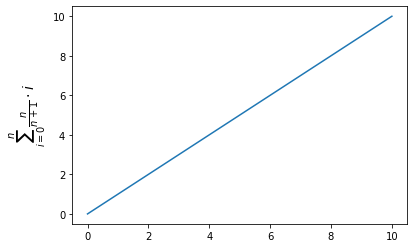

In [31]:
import numpy as np
import matplotlib.pyplot as plt
y=np.linspace(0,10)
plt.plot(x,y)
plt.ylabel('$\sum_{i=0}^n\\frac{n}{n+1}\cdot i$',fontsize=14)